**본 코드는 Colab에서 작성되었으며, 코드 정리를 위해 Markdown을 베이스로 한 코랩 목차를 활용하였습니다.**

**Colab 환경에서의 목차 이동을 추천드립니다.**

---


# Google Colab with Google Drive


In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# PIP Install

In [ ]:
!pip install imbalanced-learn
!pip install scikit-learn scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.7 MB/s eta 0:00:00


---


# Library Import


In [2]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler



---


# Random Seed fix

In [3]:
import random as python_random # 시드값 고정
seed_num = 42
np.random.seed(seed_num)
python_random.seed(seed_num)



---


# Version

In [ ]:
import platform

# OS
platform.platform()

'Linux-6.1.58+-x86_64-with-glibc2.35'

In [ ]:
# 런타임 유형 : CPU
print('런타임 유형 : CPU')
print()
!cat /proc/cpuinfo

런타임 유형 : CPU

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignme

In [ ]:
import sys
import sklearn
import numpy
import pandas
import matplotlib

sys.version
print('-Google Colab-')
!cat /etc/issue.net
!python --version
print('Numpy ' + numpy.__version__)
print('Pandas ' + pandas.__version__)
print('Sklearn ' + sklearn.__version__)
print('Matplotlib ' + matplotlib.__version__)
print('Seaborn ' + sns.__version__)

-Google Colab-
Ubuntu 22.04.3 LTS
Python 3.10.12
Numpy 1.23.5
Pandas 1.5.3
Sklearn 1.2.2
Matplotlib 3.7.1
Seaborn 0.12.2


---


# Dataset Import


In [4]:
PATH = '/content/gdrive/MyDrive/watson_healthcare_modified.csv'

In [5]:
dataset = pd.read_csv(PATH)
label = dataset['Attrition']  # Attrition : 0은 유지, 1은 이탈
dataset

EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0        1313919   41        No      Travel_Rarely       1102  Cardiology   
1        1200302   49        No  Travel_Frequently        279   Maternity   
2        1060315   37       Yes      Travel_Rarely       1373   Maternity   
3        1272912   33        No  Travel_Frequently       1392   Maternity   
4        1414939   27        No      Travel_Rarely        591   Maternity   
...          ...  ...       ...                ...        ...         ...   
1671     1117656   26       Yes      Travel_Rarely        471   Neurology   
1672     1152327   46        No      Travel_Rarely       1125  Cardiology   
1673     1812428   20        No      Travel_Rarely        959   Maternity   
1674     1812429   39        No      Travel_Rarely        466   Neurology   
1675     1152329   27        No      Travel_Rarely        511  Cardiology   

      DistanceFromHome  Education    EducationField  EmployeeCount  ...  \
0                    1          2     Life Sciences              1  ...   
1                    8          1     Life Sciences              1  ...   
2                    2          2             Other              1  ...   
3                    3          4     Life Sciences              1  ...   
4                    2          1           Medical              1  ...   
...                ...        ...               ...            ...  ...   
1671                24          3  Technical Degree              1  ...   
1672                10          3         Marketing              1  ...   
1673                 1          3     Life Sciences              1  ...   
1674                 1          1     Life Sciences              1  ...   
1675                 2          2           Medical              1  ...   

      RelationshipSatisfaction StandardHours  Shift  TotalWorkingYears  \
0                            1            80      0                  8   
1                            4            80      1                 10   
2                            2            80      0                  7   
3                            3            80      0                  8   
4                            4            80      1                  6   
...                        ...           ...    ...                ...   
1671                         2            80      0                  1   
1672                         3            80      1                 15   
1673                         4            80      0                  1   
1674                         3            80      1                 21   
1675                         2            80      0                  9   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                         0               1               6   
1                         3               3              10   
2                         3               3               0   
3                         3               3               8   
4                         3               3               2   
...                     ...             ...             ...   
1671                      3               1               1   
1672                      3               3               3   
1673                      0               4               1   
1674                      3               3              21   
1675                      5               2               8   

     YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                     4                        0                     5  
1                     7                        1                     7  
2                     0                        0                     0  
3                     7                        3                     0  
4                     2                        2                     2  
...                 ...                      ...                   ...  
1671                  0

---


# Simple EDA

## Dtype

In [ ]:
# info
display(dataset.info())
print()

# data type
print('DATA_TYPE\n')
print('dtype이 object인 column')
display(dataset.dtypes[dataset.dtypes == object])
print()
print('dtype이 int인 column')
display(dataset.dtypes[dataset.dtypes == int])
print()
print('dtype이 float인 column')
display(dataset.dtypes[dataset.dtypes == float])
print()

# describe
display(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

None


DATA_TYPE

dtype이 object인 column


Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object


dtype이 int인 column


EmployeeID                  int64
Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
Shift                       int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object


dtype이 float인 column


Series([], dtype: object)

EmployeeID          Age    DailyRate  DistanceFromHome    Education  \
count  1.676000e+03  1676.000000  1676.000000       1676.000000  1676.000000   
mean   1.456796e+06    36.866348   800.557876          9.221957     2.907518   
std    2.487486e+05     9.129126   401.594438          8.158118     1.025835   
min    1.025177e+06    18.000000   102.000000          1.000000     1.000000   
25%    1.235832e+06    30.000000   465.000000          2.000000     2.000000   
50%    1.464606e+06    36.000000   796.500000          7.000000     3.000000   
75%    1.667992e+06    43.000000  1157.000000         14.000000     4.000000   
max    1.886378e+06    60.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count         1676.0              1676.000000  1676.000000     1676.000000   
mean             1.0                 2.714797    65.470167        2.724940   
std              0.0                 1.097534    20.207572        0.714121   
min              1.0                 1.000000    30.000000        1.000000   
25%              1.0                 2.000000    48.000000        2.000000   
50%              1.0                 3.000000    65.500000        3.000000   
75%              1.0                 4.000000    83.000000        3.000000   
max              1.0                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours        Shift  \
count  1676.000000  ...               1676.000000         1676.0  1676.000000   
mean      2.066826  ...                  2.718377           80.0     0.806086   
std       1.113423  ...                  1.078162            0.0     0.855527   
min       1.000000  ...                  1.000000           80.0     0.000000   
25%       1.000000  ...                  2.000000           80.0     0.000000   
50%       2.000000  ...                  3.000000           80.0     1.000000   
75%       3.000000  ...                  4.000000           80.0     1.000000   
max       5.000000  ...                  4.000000           80.0     3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1676.000000            1676.000000      1676.000000   
mean           11.338902               2.805489         2.766110   
std             7.834996               1.288431         0.702369   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1676.000000         1676.000000              1676.000000   
mean         7.033413            4.264916                 2.200477   
std          6.098991            3.627456                 3.229587   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%         10.000000            7.000000                 3.000000   
max         40.000000           18.000000                15.000000   

       YearsWithCurrManager  
count           1676.000000  
mean               4.135442  
std                3.559662  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000  

[8 rows x 26 columns]

 Numerical Column에 대한 Describe

In [ ]:
num_ord_cols = dataset.select_dtypes('number').columns
dataset[num_ord_cols].describe().T

count          mean            std        min  \
EmployeeID                1676.0  1.456796e+06  248748.624383  1025177.0   
Age                       1676.0  3.686635e+01       9.129126       18.0   
DailyRate                 1676.0  8.005579e+02     401.594438      102.0   
DistanceFromHome          1676.0  9.221957e+00       8.158118        1.0   
Education                 1676.0  2.907518e+00       1.025835        1.0   
EmployeeCount             1676.0  1.000000e+00       0.000000        1.0   
EnvironmentSatisfaction   1676.0  2.714797e+00       1.097534        1.0   
HourlyRate                1676.0  6.547017e+01      20.207572       30.0   
JobInvolvement            1676.0  2.724940e+00       0.714121        1.0   
JobLevel                  1676.0  2.066826e+00       1.113423        1.0   
JobSatisfaction           1676.0  2.738663e+00       1.104005        1.0   
MonthlyIncome             1676.0  6.516513e+03    4728.456618     1009.0   
MonthlyRate               1676.0  1.428702e+04    7138.857783     2094.0   
NumCompaniesWorked        1676.0  2.662291e+00       2.477704        0.0   
PercentSalaryHike         1676.0  1.519690e+01       3.646550       11.0   
PerformanceRating         1676.0  3.150358e+00       0.357529        3.0   
RelationshipSatisfaction  1676.0  2.718377e+00       1.078162        1.0   
StandardHours             1676.0  8.000000e+01       0.000000       80.0   
Shift                     1676.0  8.060859e-01       0.855527        0.0   
TotalWorkingYears         1676.0  1.133890e+01       7.834996        0.0   
TrainingTimesLastYear     1676.0  2.805489e+00       1.288431        0.0   
WorkLifeBalance           1676.0  2.766110e+00       0.702369        1.0   
YearsAtCompany            1676.0  7.033413e+00       6.098991        0.0   
YearsInCurrentRole        1676.0  4.264916e+00       3.627456        0.0   
YearsSinceLastPromotion   1676.0  2.200477e+00       3.229587        0.0   
YearsWithCurrManager      1676.0  4.135442e+00       3.559662        0.0   

                                 25%        50%         75%        max  
EmployeeID                1235831.75  1464606.0  1667992.00  1886378.0  
Age                            30.00       36.0       43.00       60.0  
DailyRate                     465.00      796.5     1157.00     1499.0  
DistanceFromHome                2.00        7.0       14.00       29.0  
Education                       2.00        3.0        4.00        5.0  
EmployeeCount                   1.00        1.0        1.00        1.0  
EnvironmentSatisfaction         2.00        3.0        4.00        4.0  
HourlyRate                     48.00       65.5       83.00      100.0  
JobInvolvement                  2.00        3.0        3.00        4.0  
JobLevel                        1.00        2.0        3.00        5.0  
JobSatisfaction                 2.00        3.0        4.00        4.0  
MonthlyIncome                2928.25     4899.0     8380.25    19999.0  
MonthlyRate                  7993.00    14269.5    20462.00    26999.0  
NumCompaniesWorked              1.00        2.0        4.00        9.0  
PercentSalaryHike              12.00       14.0       18.00       25.0  
PerformanceRating               3.00        3.0        3.00        4.0  
RelationshipSatisfaction        2.00        3.0        4.00        4.0  
StandardHours                  80.00       80.0       80.00       80.0  
Shift                           0.00        1.0        1.00        3.0  
TotalWorkingYears               6.00       10.0       15.00       40.0  
TrainingTimesLastYear           2.00        3.0        3.00        6.0  
WorkLifeBalance                 2.00        3.0        3.00        4.0  
YearsAtCompany                  3.00        5.0       10.00       40.0  
YearsInCurrentRole              2.00        3.0        7.00       18.0  
YearsSinceLastPromotion         0.00        1.0        3.00       15.0  
YearsWithCurrManager            2.00        3.0        7.00       17.0

## Missingno

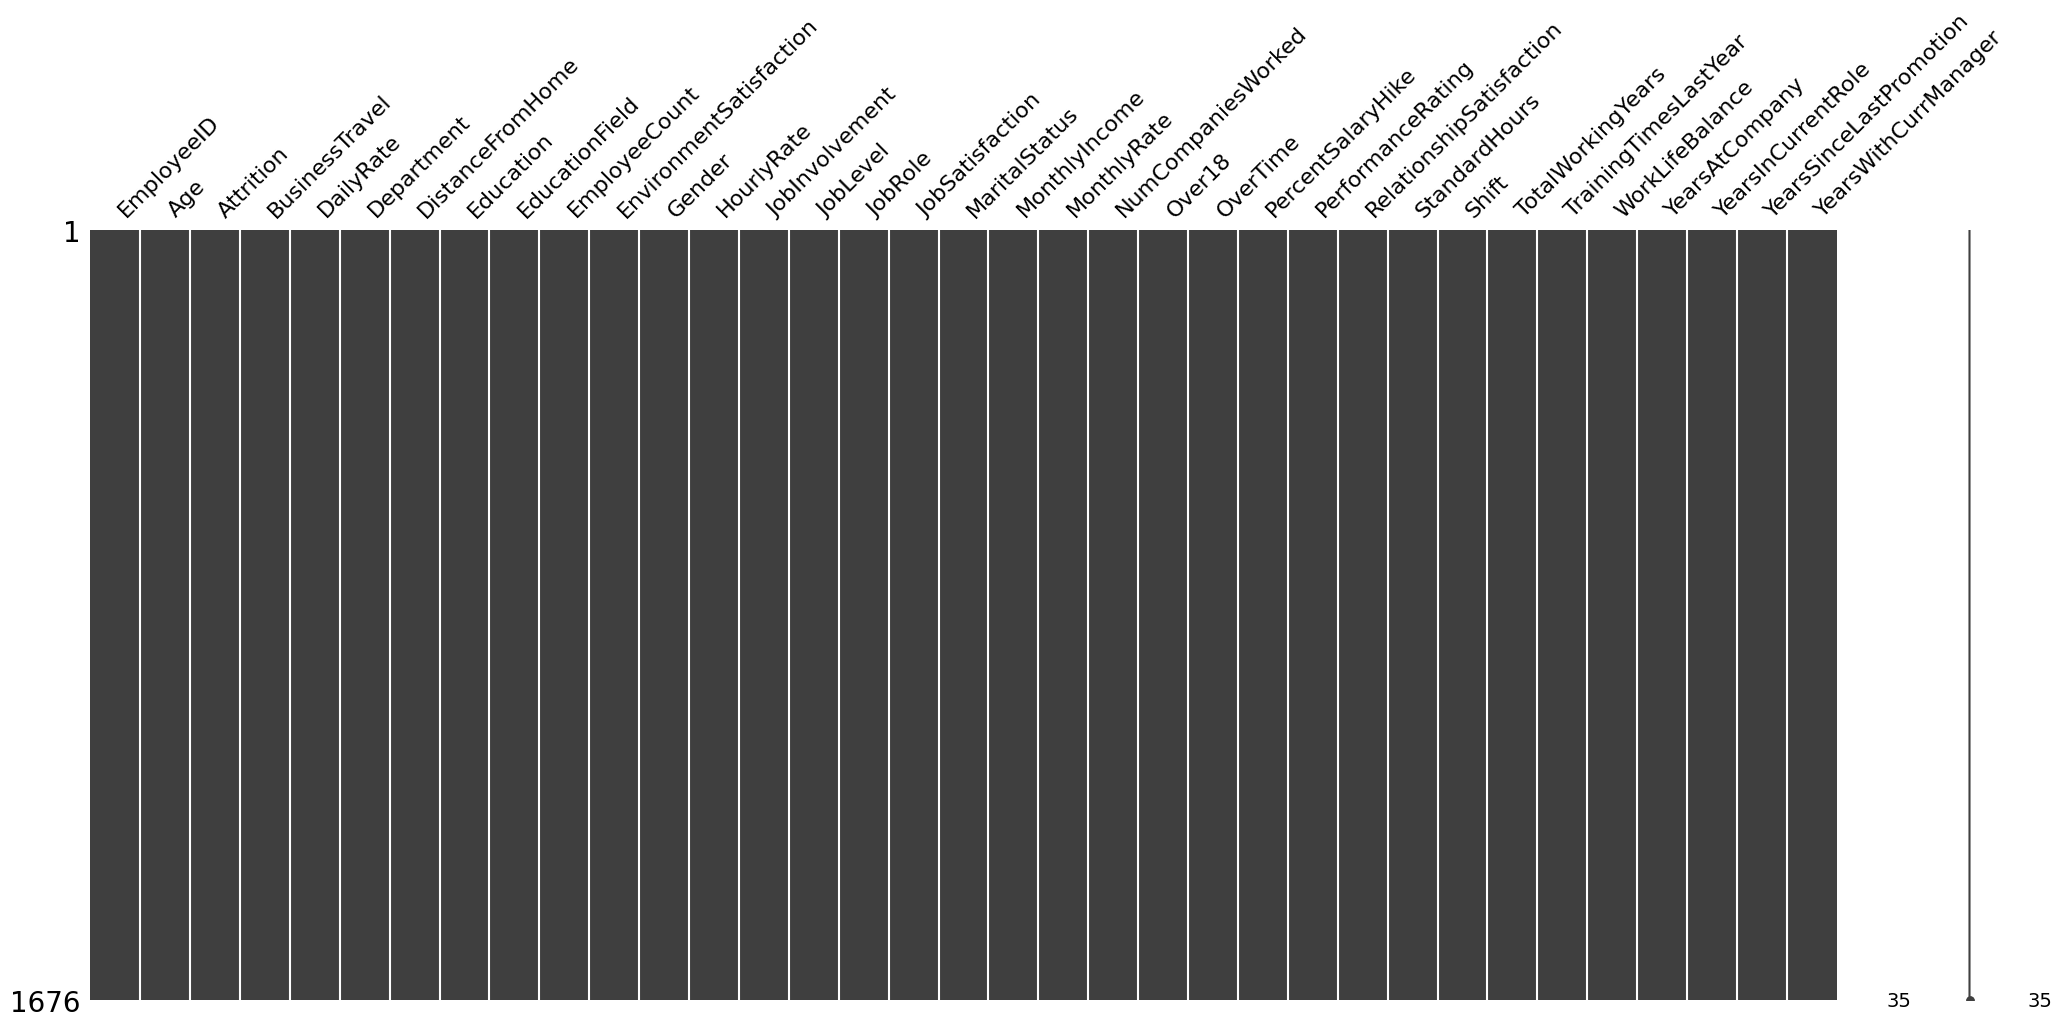

In [ ]:
msno.matrix(dataset)
plt.show()

In [ ]:
print('Dataset의 Row 수 : {}\n'.format(dataset.shape[0]))
print('결측치가 있는 Row 수 : {}\n'.format(dataset.shape[0] - dataset.dropna().shape[0]))

Dataset의 Row 수 : 1676

결측치가 있는 Row 수 : 0



## Histogram

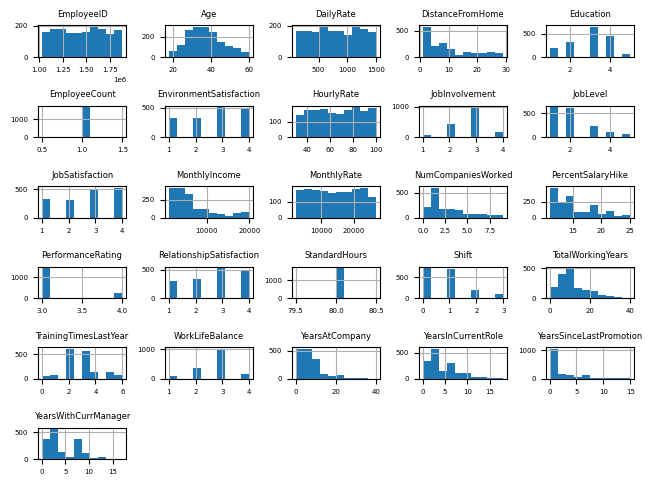

In [ ]:
plt.rc('font', size=5)
dataset.iloc[:,:].hist()
plt.tight_layout()

## Categorical Column Detail

In [ ]:
cat_cols = []
for i in dataset.columns :
  if dataset[i].dtype == 'object' :
    cat_cols.append(i)

for i in cat_cols :
  print('{} : {}.  총 {}개\n'.format(i,dataset[i].unique(),dataset[i].nunique()))

Attrition : ['No' 'Yes'].  총 2개

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'].  총 3개

Department : ['Cardiology' 'Maternity' 'Neurology'].  총 3개

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'].  총 6개

Gender : ['Female' 'Male'].  총 2개

JobRole : ['Nurse' 'Other' 'Therapist' 'Administrative' 'Admin'].  총 5개

MaritalStatus : ['Single' 'Married' 'Divorced'].  총 3개

Over18 : ['Y'].  총 1개

OverTime : ['Yes' 'No'].  총 2개



Categorical column에 대한 Hist

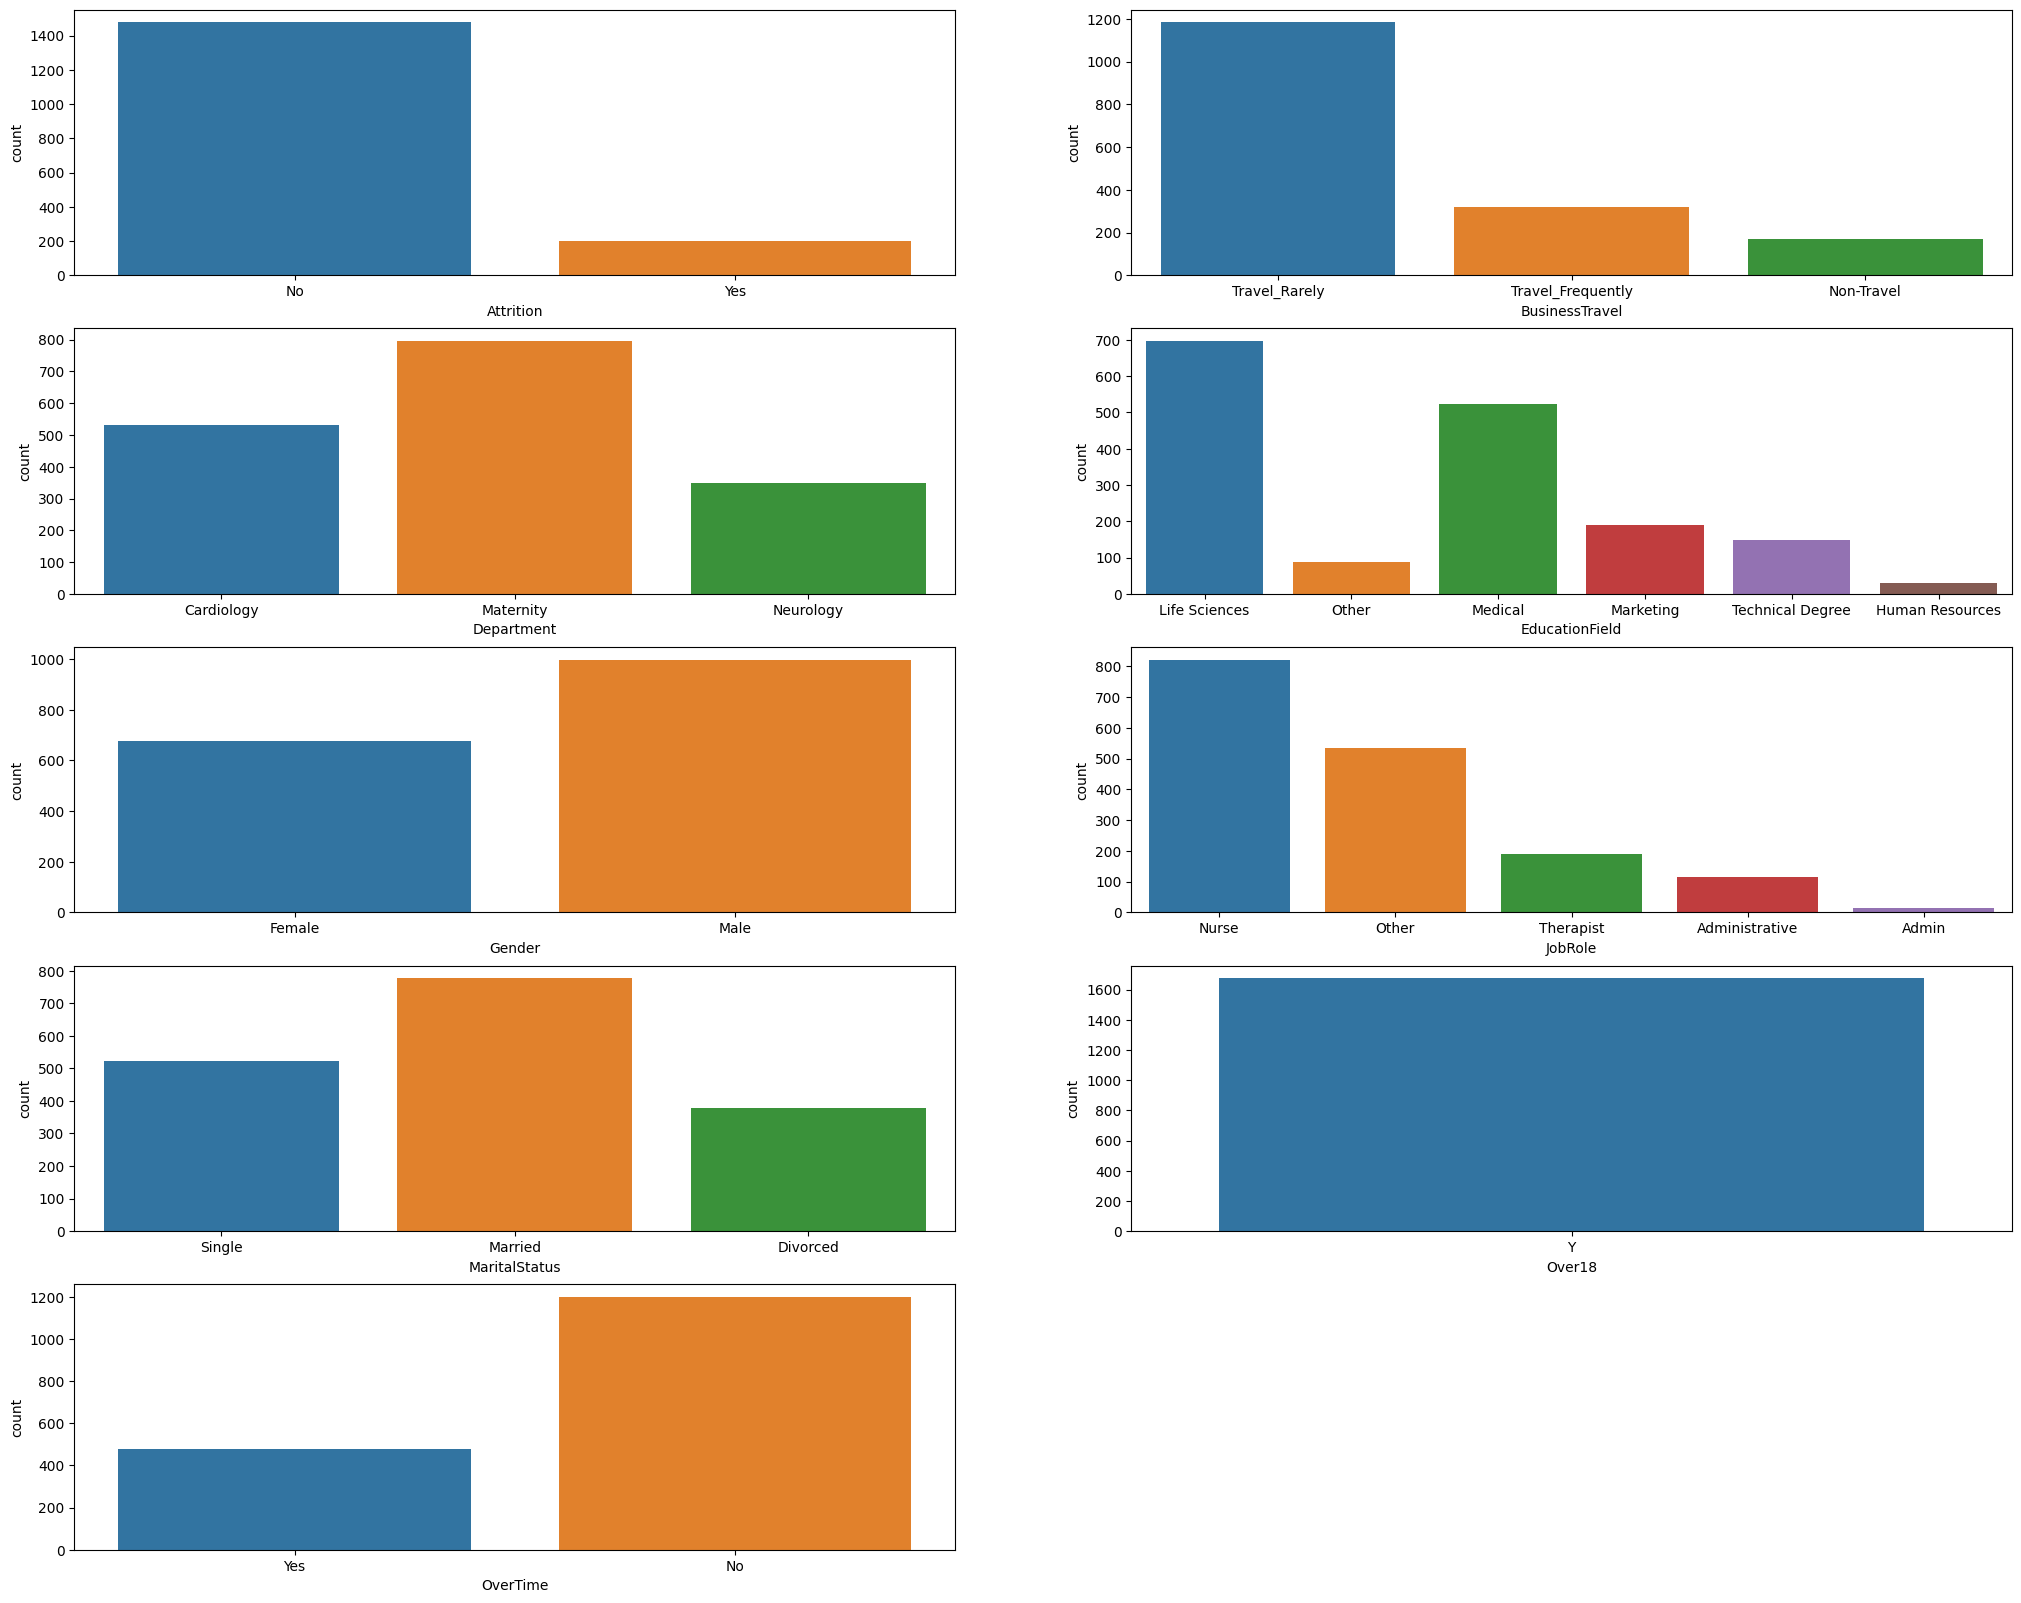

In [ ]:
plt.figure(figsize=(25, 20))
plt.rc('font', size=10)
for i in range(len(cat_cols)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=cat_cols[i], data=dataset)

plt.show()

Categorical column의 Label에 따른 hist

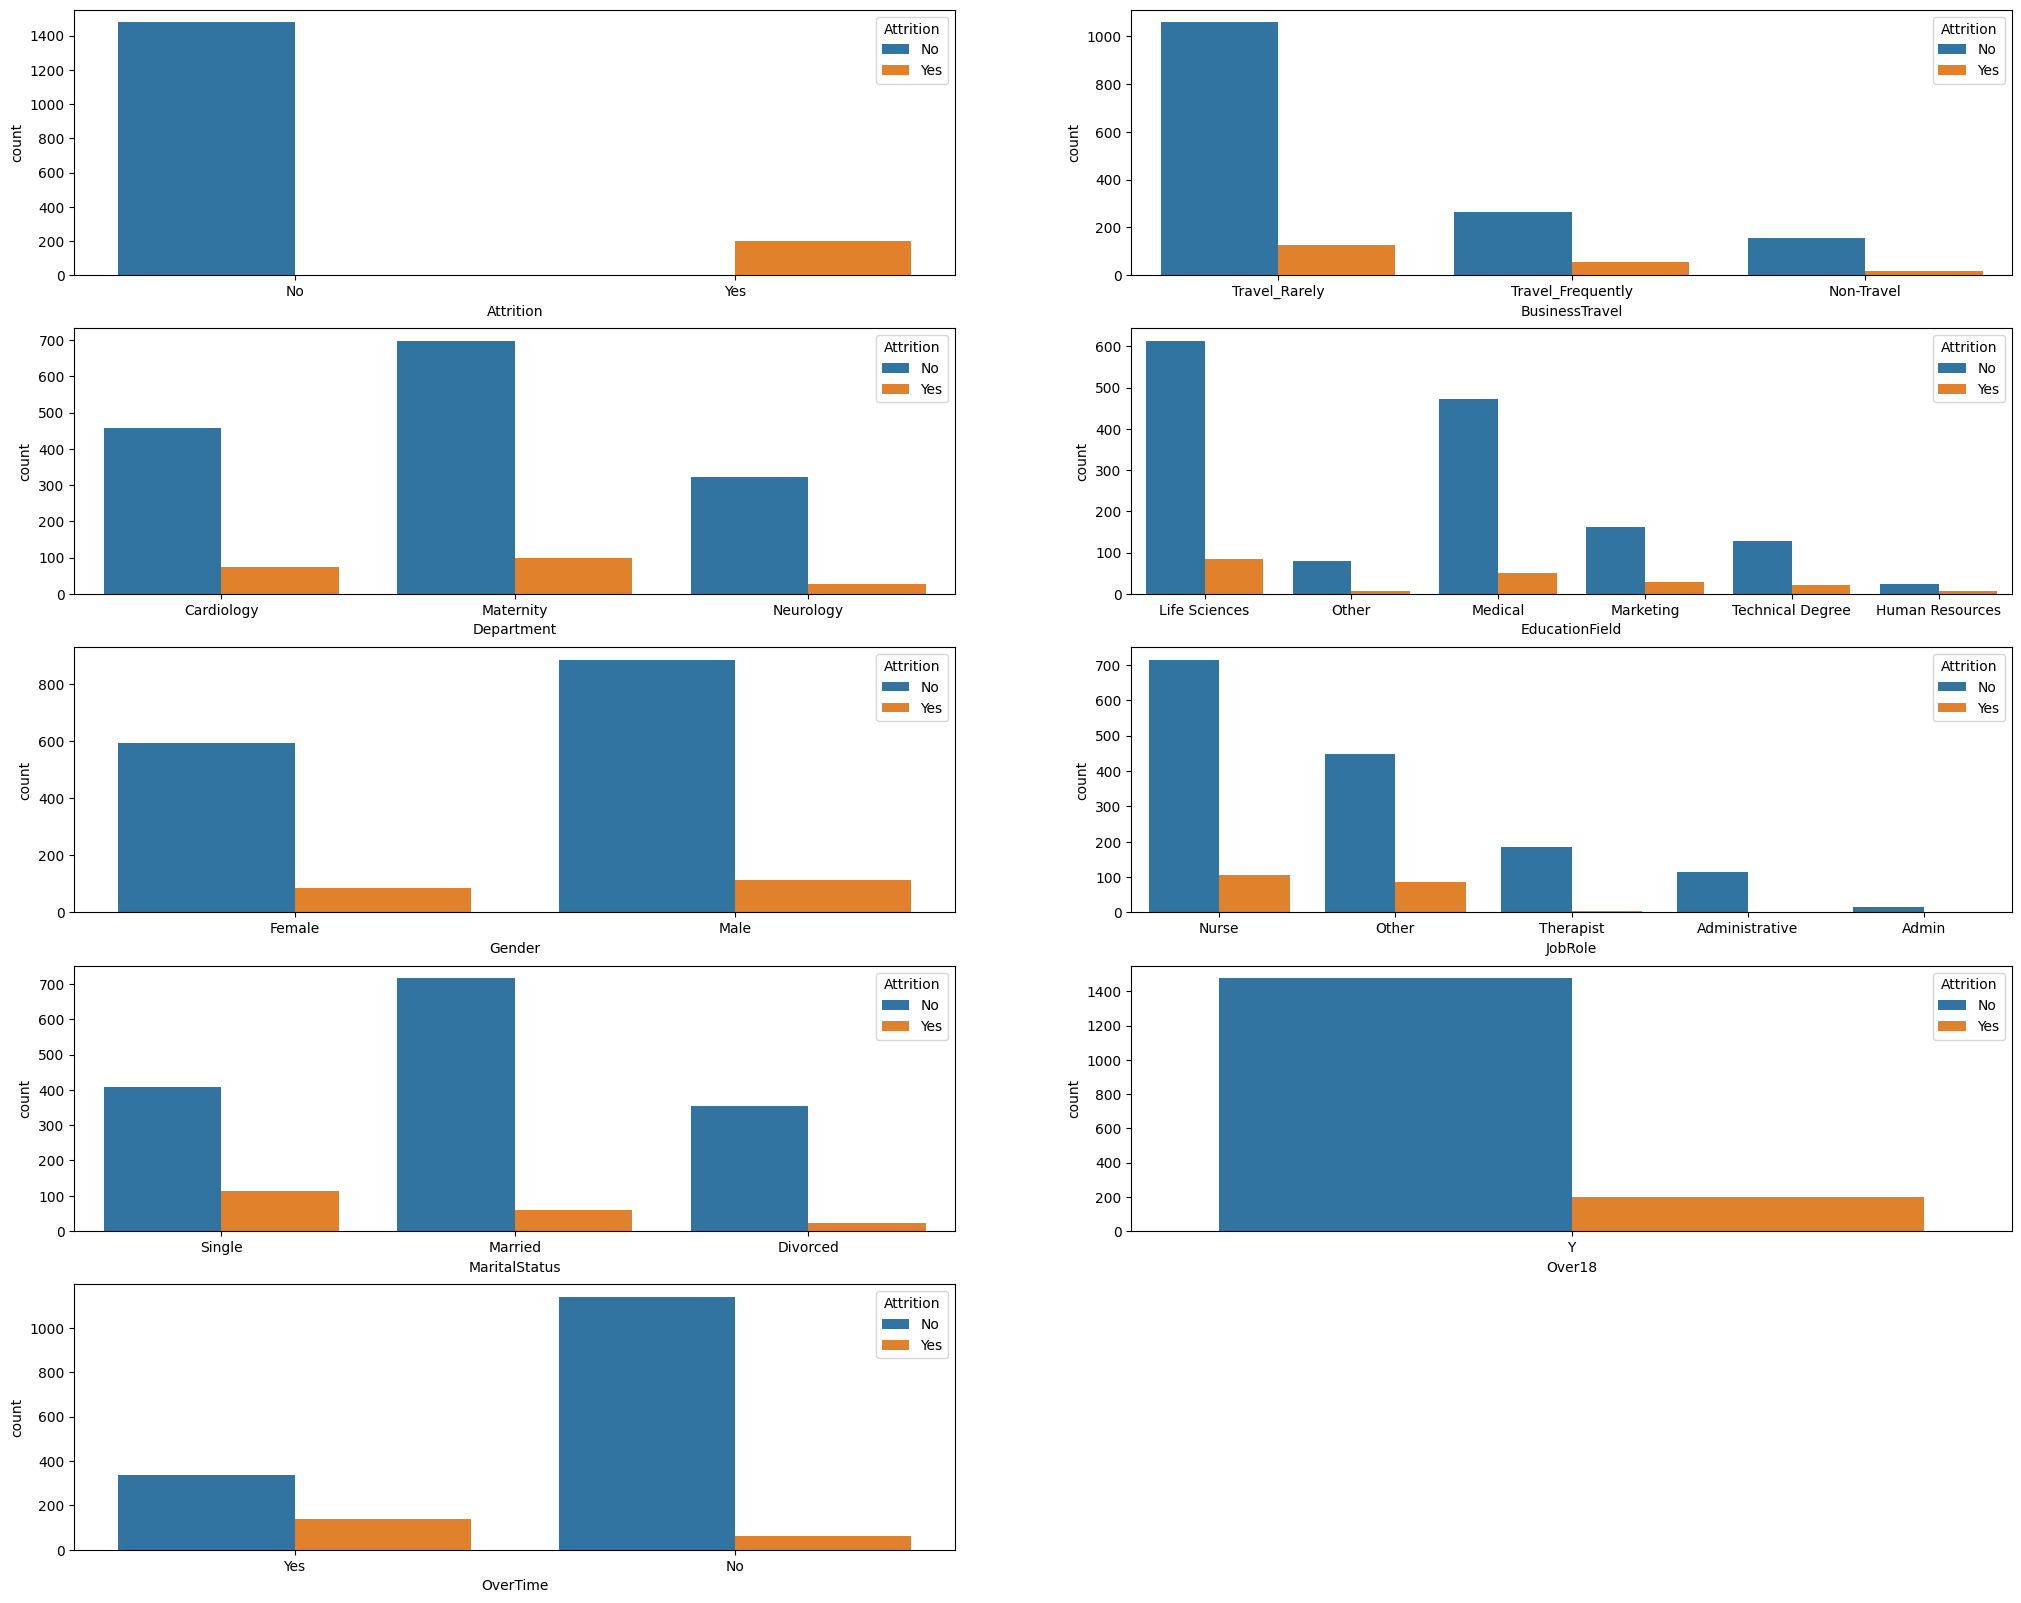

In [ ]:
plt.figure(figsize=(25, 20))

for i in range(len(cat_cols)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=cat_cols[i], data=dataset, hue='Attrition')

plt.show()

---


# Preprocessing

※ 전처리 중 Scaler나 각종 변환은 Train과 Test를 모두 합쳐서 적용하면
Test의 분포가 Train에 영향을 미쳐서 Data Leakage 발생.

**따라서 Scaler 같이 학습 후 변환하는 메소드는 Train만을 이용해서 학습 후, Test에는 Only Transform**

아래의 변환 처리를 위한 EDA와 변환 과정들은 Only Train만을 참고!

## Meaningless Column Drop

In [ ]:
single_val_col = []

for i in dataset.columns:
  if dataset[i].nunique()==1 :
    single_val_col.append(i)
single_val_col

['EmployeeCount', 'Over18', 'StandardHours']

In [ ]:
print('EmployeeCount에 저장된 단일 값 : {}'.format(dataset['EmployeeCount'].unique()))   # 하나의 Row는 한명의 사람만 저장
print('Over18에 저장된 단일 값 : {}'.format(dataset['Over18'].unique()))                 # 모두 만 18세 이상
print('StandardHours에 저장된 단일 값 : {}'.format(dataset['StandardHours'].unique()))   # 동일 조건 (표준근로시간? 추정)

EmployeeCount에 저장된 단일 값 : [1]
Over18에 저장된 단일 값 : ['Y']
StandardHours에 저장된 단일 값 : [80]


In [ ]:
dataset = dataset.drop(columns=['EmployeeID','EmployeeCount', 'Over18', 'StandardHours']) # ID Column과 단일값으로 채워진 Column은 학습에 불필요하므로 제거 (해석에선 활용 가능)

## Train / Test (70:30)

In [6]:
from sklearn.model_selection import train_test_split

# 데이터셋을 훈련 세트와 나머지 세트로 분할 (70% / 30%)
train_set, test_set = train_test_split(dataset, test_size=0.3, stratify=dataset['Attrition'] ,random_state=42)  # Class 불균형이 존재하므로, General한 성능 평가를 위해 Stratify 옵션 설정해서 분할
print('Trainset의 SIZE : {}\n'.format(train_set.shape[0]))
print('Testset의 SIZE : {}\n'.format(test_set.shape[0]))

Trainset의 SIZE : 1173

Testset의 SIZE : 503



In [8]:
print('Trainset의 이탈 비율 : {}\n'.format(train_set[train_set.Attrition=='Yes'].shape[0]/train_set.shape[0]))
print('Testset의 이탈 비율 : {}\n'.format(test_set[test_set.Attrition=='Yes'].shape[0]/test_set.shape[0]))

Trainset의 이탈 비율 : 0.1184995737425405

Testset의 이탈 비율 : 0.11928429423459244



## Missing Value

- 결측치는 존재하지 않으므로 다른 처리 X

## Categorical Feature Encoding

Categorical Columns : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [ ]:
cat_cols = train_set.select_dtypes('object').columns

In [ ]:
# 모든 Cat column을 label encoding

all_label_train_set = train_set.copy()

for col in cat_cols:
    le = LabelEncoder()
    all_label_train_set[col] = le.fit_transform(train_set[col])


# 모든 Cat column을 one hot encoding
cat_cols = [col for col in cat_cols if col != 'Attrition']
all_onehot_train_set = pd.get_dummies(train_set, columns=cat_cols)
if 'Attrition' in train_set.columns and train_set['Attrition'].dtype == 'object':
    all_onehot_train_set['Attrition'] = all_onehot_train_set['Attrition'].replace({'No':0, 'Yes':1})

In [ ]:
all_label_train_set.head(5)

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
659    43          0               2        177           0                 8   
1074   29          1               2        224           1                 1   
1024   34          0               2        401           1                 1   
81     35          0               2       1214           1                 1   
1653   37          1               0       1252           0                19   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
659           3               1                        1       0  ...   
1074          4               5                        1       1  ...   
1024          3               1                        4       0  ...   
81            3               3                        2       1  ...   
1653          2               3                        1       1  ...   

      PerformanceRating  RelationshipSatisfaction  Shift  TotalWorkingYears  \
659                   4                         3      1                  4   
1074                  3                         3      0                 11   
1024                  3                         1      1                  7   
81                    3                         1      0                  6   
1653                  3                         4      0                 10   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
659                       2                4               1   
1074                      2                1               9   
1024                      2                2               5   
81                        3                3               6   
1653                      2                3              10   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
659                    0                        0                     0  
1074                   7                        0                     7  
1024                   4                        0                     2  
81                     4                        0                     4  
1653                   0                        0                     9  

[5 rows x 31 columns]

In [ ]:
all_onehot_train_set.head(5)

Age  Attrition  DailyRate  DistanceFromHome  Education  \
659    43          0        177                 8          3   
1074   29          1        224                 1          4   
1024   34          0        401                 1          3   
81     35          0       1214                 1          3   
1653   37          1       1252                19          2   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
659                         1          55               3         2   
1074                        1         100               2         1   
1024                        4          86               2         1   
81                          2          30               2         1   
1653                        1          32               3         3   

      JobSatisfaction  ...  JobRole_Admin  JobRole_Administrative  \
659                 2  ...              0                       0   
1074                1  ...              0                       0   
1024                2  ...              0                       0   
81                  3  ...              0                       0   
1653                2  ...              0                       0   

      JobRole_Nurse  JobRole_Other  JobRole_Therapist  MaritalStatus_Divorced  \
659               0              0                  1                       1   
1074              0              1                  0                       0   
1024              1              0                  0                       0   
81                0              1                  0                       0   
1653              1              0                  0                       0   

      MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
659                       0                     0            1             0  
1074                      0                     1            1             0  
1024                      1                     0            1             0  
81                        0                     1            1             0  
1653                      0                     1            0             1  

[5 rows x 48 columns]

In [ ]:
# Font Size
plt.rc('font', size=8)

### Attrition (Y)

Trainset의 SIZE : 1173

Testset의 SIZE : 503



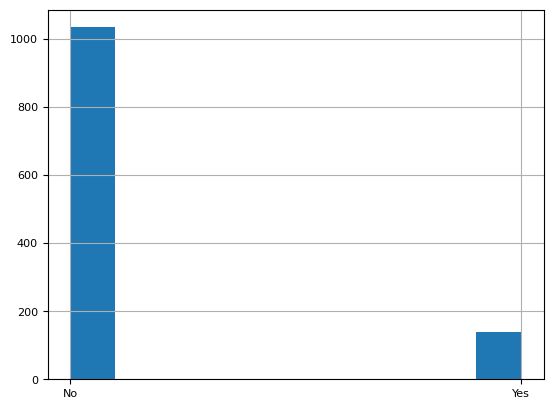

In [ ]:
# Attrition Hist
train_set['Attrition'].hist()
print('Trainset의 SIZE : {}\n'.format(train_set.shape[0]))
print('Testset의 SIZE : {}\n'.format(test_set.shape[0]))

In [ ]:
# Label Encoding
train_set['Attrition'] = train_set['Attrition'].replace({'No':0,'Yes':1})
test_set['Attrition'] = test_set['Attrition'].replace({'No':0,'Yes':1})

### Gender

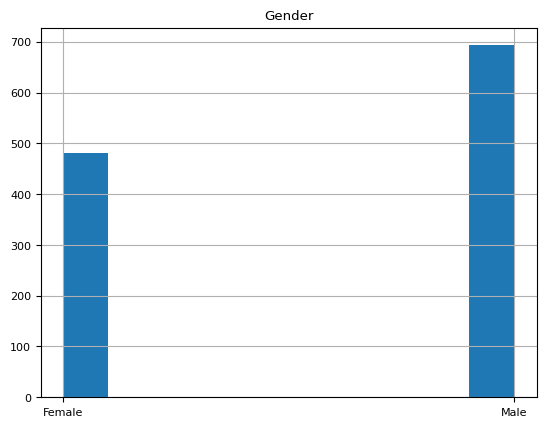

In [ ]:
# Gender Hist
plt.title('Gender')
train_set['Gender'].hist()
plt.show()

In [ ]:
# Label Encoding

le = LabelEncoder()

train_set['Gender'] = le.fit_transform(train_set['Gender'])
test_set['Gender'] = le.transform(test_set['Gender'])

### OverTime

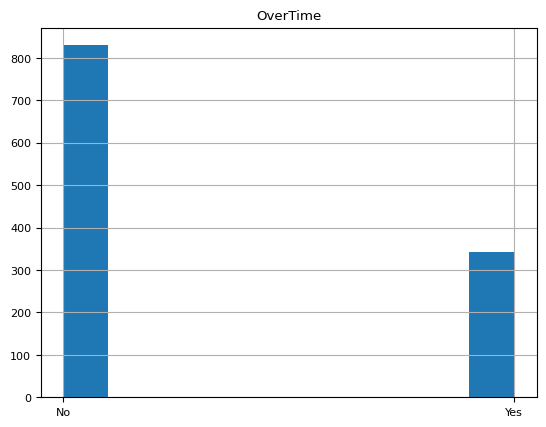

In [ ]:
# OverTime Hist
plt.title('OverTime')
train_set['OverTime'].hist()
plt.show()

In [ ]:
# Label Encoding

le = LabelEncoder()

train_set['OverTime'] = le.fit_transform(train_set['OverTime'])
test_set['OverTime'] = le.transform(test_set['OverTime'])

### BusinessTravel

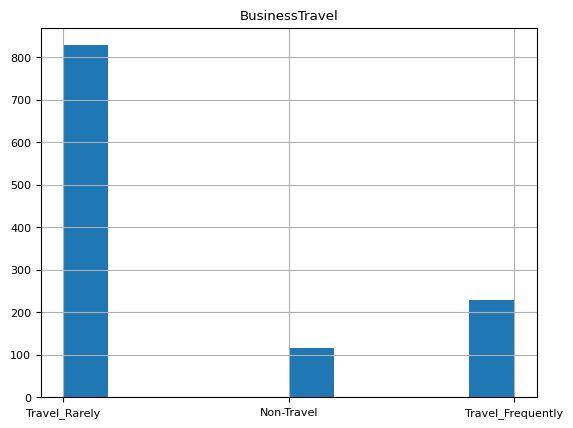

In [ ]:
# BusinessTravel Hist
plt.title('BusinessTravel')
train_set['BusinessTravel'].hist()
plt.show()

In [ ]:
# label encoding 적용 전 Check (확인차)
train_set['BusinessTravel'].nunique() == test_set['BusinessTravel'].nunique()

True

In [ ]:
# Label Encoding

train_set['BusinessTravel'] = train_set['BusinessTravel'].replace({'Non-Travel':0,'Travel_Rarely':1, 'Travel_Frequently':2})
test_set['BusinessTravel'] = test_set['BusinessTravel'].replace({'Non-Travel':0,'Travel_Rarely':1, 'Travel_Frequently':2})

### Department

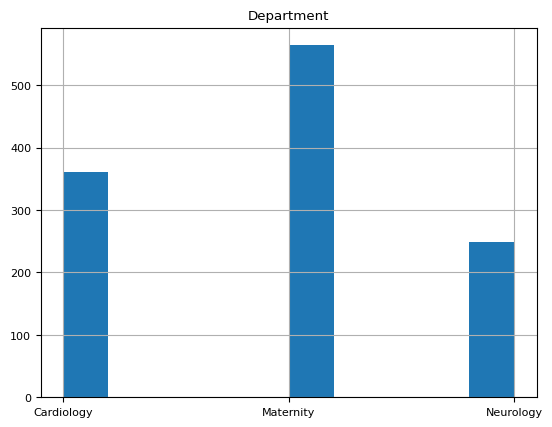

In [ ]:
# Department Hist
plt.title('Department')
train_set['Department'].hist()
plt.show()

In [ ]:
# get_dummies 적용 전 Check (확인차)
train_set['Department'].nunique() == test_set['Department'].nunique()

True

In [ ]:
# One-Hot-Encoding

# 동일한 더미 변환 적용
train_set = pd.get_dummies(train_set, columns=['Department'])
test_set = pd.get_dummies(test_set, columns=['Department'])

###MaritalStatus

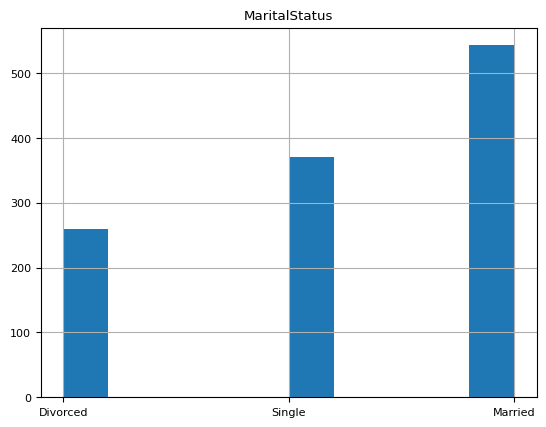

In [ ]:
# MaritalStatus Hist
plt.title('MaritalStatus')
train_set['MaritalStatus'].hist()
plt.show()

In [ ]:
# get_dummies 적용 전 Check (확인차)
train_set['MaritalStatus'].nunique() == test_set['MaritalStatus'].nunique()

True

In [ ]:
# One-Hot-Encoding

# 동일한 더미 변환 적용
train_set = pd.get_dummies(train_set, columns=['MaritalStatus'])
test_set = pd.get_dummies(test_set, columns=['MaritalStatus'])

###JobRole

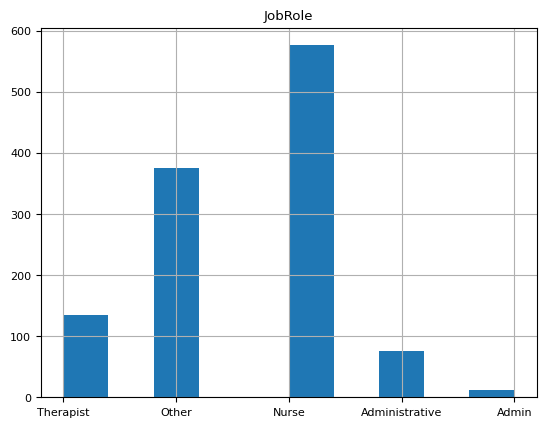

In [ ]:
# JobRole Hist
plt.title('JobRole')
train_set['JobRole'].hist()
plt.show()

In [ ]:
# train과 test에 따라 달라지는 항목 존재여부 Check (확인차)
train_set['JobRole'].nunique() == test_set['JobRole'].nunique()

True

In [ ]:
from sklearn.feature_extraction import FeatureHasher

# Feature Hasher 생성
hasher = FeatureHasher(n_features=3, input_type='string')

# 특정 컬럼에 Feature Hashing 적용
hashed_features_train = hasher.transform(train_set['JobRole'].apply(lambda x: [x]))
hashed_features_test = hasher.transform(test_set['JobRole'].apply(lambda x: [x]))

# 해시된 결과를 DataFrame으로 변환
hashed_features_train_df = pd.DataFrame(hashed_features_train.toarray(),index=train_set.index, columns=['Job1','Job2','Job3'])
hashed_features_test_df = pd.DataFrame(hashed_features_test.toarray(),index=test_set.index, columns=['Job1','Job2','Job3'])

# 원본 DataFrame에 해시된 특성 추가
train_set_hash = pd.concat([train_set, hashed_features_train_df], axis=1)
test_set_hash = pd.concat([test_set, hashed_features_test_df], axis=1)
train_set_hash = train_set_hash.drop(columns='JobRole')
test_set_hash = test_set_hash.drop(columns='JobRole')

In [ ]:
# One-Hot-Encoding

# 동일한 더미 변환 적용
train_set_ohe = pd.get_dummies(train_set, columns=['JobRole'])
test_set_ohe = pd.get_dummies(test_set, columns=['JobRole'])

### EducationField

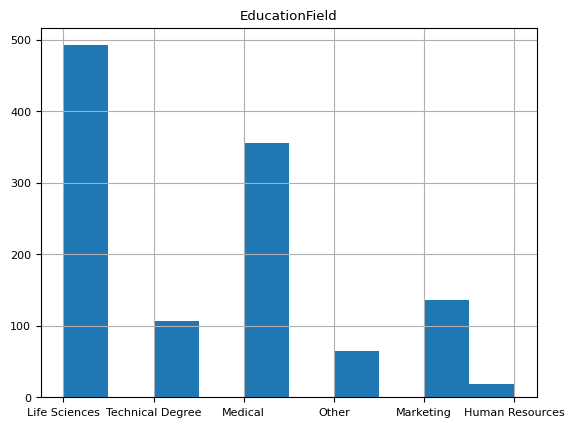

In [ ]:
# EducationField Hist
plt.title('EducationField')
train_set['EducationField'].hist()
plt.show()

In [ ]:
# train과 test에 따라 달라지는 항목 존재여부 Check (확인차)
train_set['EducationField'].nunique() == test_set['EducationField'].nunique()

True

In [ ]:
from sklearn.feature_extraction import FeatureHasher

# Feature Hasher 생성
hasher = FeatureHasher(n_features=3, input_type='string')

# 특정 컬럼에 Feature Hashing 적용
hashed_features_train = hasher.transform(train_set['EducationField'].apply(lambda x: [x]))
hashed_features_test = hasher.transform(test_set['EducationField'].apply(lambda x: [x]))

# 해시된 결과를 DataFrame으로 변환
hashed_features_train_df = pd.DataFrame(hashed_features_train.toarray(),index=train_set.index, columns=['Edu1','Edu2','Edu3'])
hashed_features_test_df = pd.DataFrame(hashed_features_test.toarray(),index=test_set.index, columns=['Edu1','Edu2','Edu3'])

# 원본 DataFrame에 해시된 특성 추가
train_set_hash = pd.concat([train_set_hash, hashed_features_train_df], axis=1)
test_set_hash = pd.concat([test_set_hash, hashed_features_test_df], axis=1)
train_set_hash = train_set_hash.drop(columns='EducationField')
test_set_hash = test_set_hash.drop(columns='EducationField')

In [ ]:
# One-Hot-Encoding

# 동일한 더미 변환 적용
train_set_ohe = pd.get_dummies(train_set_ohe, columns=['EducationField'])
test_set_ohe = pd.get_dummies(test_set_ohe, columns=['EducationField'])



---
- Case 1) 모든 Categorical column을 LabelEncoding (Dataset 0)
- Case 2) 모든 Categorical column을 OneHotEncoding (Dataset 1)
- Case 3) Cardinality 2개 이하 Label, 2~4개 OneHot, 5개 이상 HashEncoding (Dataset2)
- Case 4) Cardinality 2개 이하 Label, 3개 이상 OneHot (Dataset3)



---



## DataScaling

**Column Index 재조정**

In [ ]:
# column index 재조정
train_set_y = train_set['Attrition']
test_set_y = test_set['Attrition']
train_set = train_set.drop(columns='Attrition')
test_set = test_set.drop(columns='Attrition')

# Train data
all_label_train_set = all_label_train_set.drop(columns='Attrition')
all_onehot_train_set = all_onehot_train_set.drop(columns='Attrition')
train_set_hash = train_set_hash.drop(columns='Attrition')
train_set_ohe = train_set_ohe.drop(columns='Attrition')

# Test data
test_set_hash = test_set_hash.drop(columns='Attrition')
test_set_ohe = test_set_ohe.drop(columns='Attrition')

**Scaled data**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 스케일러 초기화
ss = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()

# 데이터 리스트
data_list = [all_label_train_set, all_onehot_train_set, train_set_hash, train_set_ohe]

# 결과를 저장할 딕셔너리
results = {}

# 각 데이터셋에 대해 스케일링 및 교차 검증 수행
for i, dataset in enumerate(data_list):
    dataset_name = f"Dataset_{i}"

    # Standard Scaling
    data_ss = ss.fit_transform(dataset)
    lr = LogisticRegression()

    # 정확도 계산
    accuracy = np.mean(cross_val_score(lr, data_ss, train_set_y, cv=5, scoring='accuracy'))
    results[f"{dataset_name}_StandardScaler_accuracy"] = accuracy

    # 재현율 계산
    recall = np.mean(cross_val_score(lr, data_ss, train_set_y, cv=5, scoring='recall'))
    results[f"{dataset_name}_StandardScaler_recall"] = recall

    # F1 점수 계산
    f1 = np.mean(cross_val_score(lr, data_ss, train_set_y, cv=5, scoring='f1'))
    results[f"{dataset_name}_StandardScaler_f1"] = f1


    # MinMax Scaling
    data_mm = mm.fit_transform(dataset)
    scores = cross_val_score(lr, data_mm, train_set_y, cv=5)
    results[f"{dataset_name}_MinMaxScaler_accuracy"] = np.mean(scores)

    # 재현율 계산
    recall = np.mean(cross_val_score(lr, data_mm, train_set_y, cv=5, scoring='recall'))
    results[f"{dataset_name}_MinMaxScaler_recall"] = recall

    # F1 점수 계산
    f1 = np.mean(cross_val_score(lr, data_mm, train_set_y, cv=5, scoring='f1'))
    results[f"{dataset_name}_MinMaxScaler_f1"] = f1


    # Robust Scaling
    data_rb = rb.fit_transform(dataset)
    scores = cross_val_score(lr, data_rb, train_set_y, cv=5)
    results[f"{dataset_name}_RobustScaler_accuracy"] = np.mean(scores)

    # 재현율 계산
    recall = np.mean(cross_val_score(lr, data_rb, train_set_y, cv=5, scoring='recall'))
    results[f"{dataset_name}_RobustScaler_recall"] = recall

    # F1 점수 계산
    f1 = np.mean(cross_val_score(lr, data_rb, train_set_y, cv=5, scoring='f1'))
    results[f"{dataset_name}_RobustScaler_f1"] = f1


   # Log Scaling은 음수 처리때문에 X

# 결과 출력
for i, (key, value) in enumerate(results.items()):
    print(f"{key}: {value}")
    # 빈 줄 추가
    if (i + 1) % 3 == 0:
        print()
    if (i + 1) % 9 == 0:
        print()

Dataset_0_StandardScaler_accuracy: 0.9326495726495725
Dataset_0_StandardScaler_recall: 0.6047619047619047
Dataset_0_StandardScaler_f1: 0.6727768030289039

Dataset_0_MinMaxScaler_accuracy: 0.9258374249863612
Dataset_0_MinMaxScaler_recall: 0.48994708994708996
Dataset_0_MinMaxScaler_f1: 0.6022124410404894

Dataset_0_RobustScaler_accuracy: 0.9343589743589742
Dataset_0_RobustScaler_recall: 0.5902116402116403
Dataset_0_RobustScaler_f1: 0.6733954011212612


Dataset_1_StandardScaler_accuracy: 0.9326677577741409
Dataset_1_StandardScaler_recall: 0.6333333333333333
Dataset_1_StandardScaler_f1: 0.6833343370988881

Dataset_1_MinMaxScaler_accuracy: 0.9283869794508093
Dataset_1_MinMaxScaler_recall: 0.5105820105820105
Dataset_1_MinMaxScaler_f1: 0.6252331213317082

Dataset_1_RobustScaler_accuracy: 0.933518821603928
Dataset_1_RobustScaler_recall: 0.6119047619047618
Dataset_1_RobustScaler_f1: 0.6787309795713158


Dataset_2_StandardScaler_accuracy: 0.9326604837243135
Dataset_2_StandardScaler_recall: 0.618

**최종적으로 Standard Scaling & train_set_ohe (Trainset은 일부는 label / 일부는 ohe)**

선정된 모델의 p-value check (유효한 모델인지)

In [ ]:
# 이렇게 선정된 모델의 p-value check (유효한 모델인지)
import statsmodels.api as sm

# Standard Scale & One-hot, Label (Selected Preprocessing)
ss = StandardScaler()
train_for_check = train_set_ohe.copy()
train_for_check.iloc[:,:] = ss.fit_transform(train_set_ohe.iloc[:,:])  # Y = train_set_y

# statsmodels는 절편을 자동으로 추가하지 않으므로, 수동으로 추가
X_train_sm = sm.add_constant(train_for_check)

# 로지스틱 회귀 모델 생성 및 훈련
model = sm.Logit(train_set_y, X_train_sm)
result = model.fit(maxiter=500)

# 결과 요약 출력
print(result.summary())

         Current function value: 0.141633
         Iterations: 500
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1173
Model:                          Logit   Df Residuals:                     1133
Method:                           MLE   Df Model:                           39
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.6108
Time:                        15:47:27   Log-Likelihood:                -166.14
converged:                      False   LL-Null:                       -426.88
Covariance Type:            nonrobust   LLR p-value:                 1.116e-85
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -7.4432   1.19e+06  -6.25e-06      1.000   -2.33e+06    2.33e+06
A

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


LLR p-value = 1.116e-85 : 통계적으로 모델 자체도 유효함을 알 수 있음

**2D PCA Visualization(Unpreprocessed)**

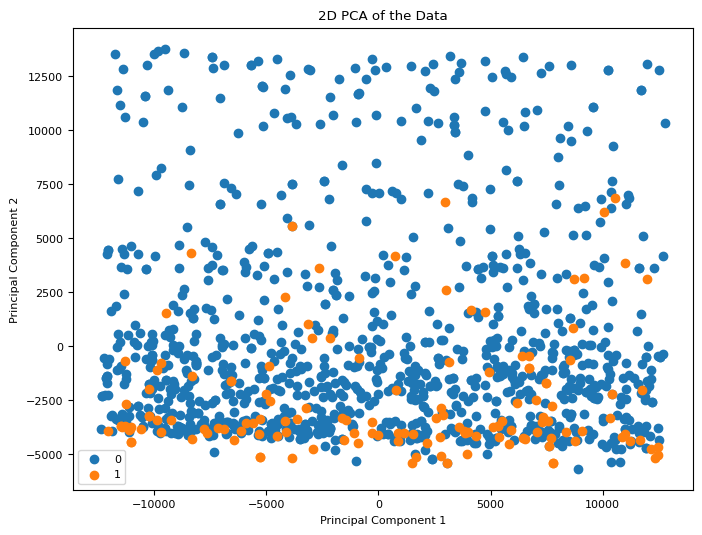

In [ ]:
from sklearn.decomposition import PCA

# PCA 수행
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_set_ohe.iloc[:,:])

# PCA 결과와 레이블을 데이터프레임에 추가
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Label'] = train_set_y.values

# 시각화
plt.figure(figsize=(8, 6))
for label in np.unique(df_pca['Label']):
    plt.scatter(df_pca[df_pca['Label'] == label]['PC1'], df_pca[df_pca['Label'] == label]['PC2'], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of the Data')
plt.legend()
plt.show()

**PreProcessing**

In [ ]:
ss = StandardScaler()

# Standard Scale & One-hot, Label
train_set_ohe.iloc[:,:] = ss.fit_transform(train_set_ohe.iloc[:,:])  # Y = train_set_y
test_set_ohe.iloc[:,:] = ss.transform(test_set_ohe.iloc[:,:])       # Y = test_set_y

train_set = train_set_ohe.copy()
test_set = test_set_ohe.copy()

**2D PCA Visualization(Preprocessed)**

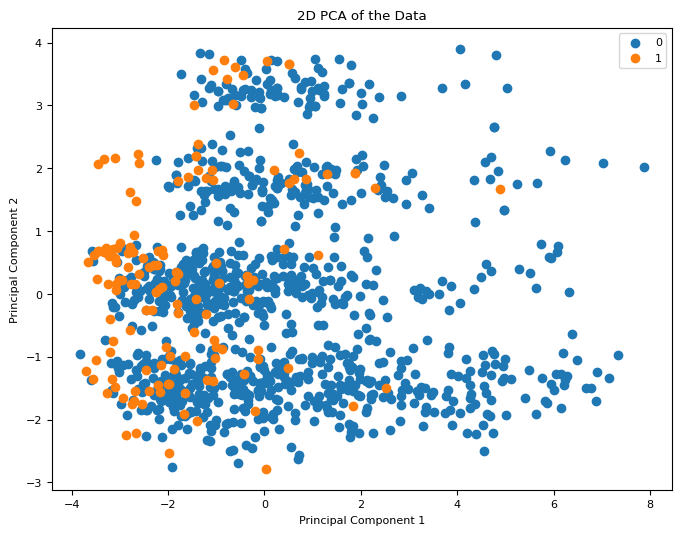

In [ ]:
from sklearn.decomposition import PCA

# PCA 수행
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_set.iloc[:,:])

# PCA 결과와 레이블을 데이터프레임에 추가
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Label'] = train_set_y.values

# 시각화
plt.figure(figsize=(8, 6))
for label in np.unique(df_pca['Label']):
    plt.scatter(df_pca[df_pca['Label'] == label]['PC1'], df_pca[df_pca['Label'] == label]['PC2'], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of the Data')
plt.legend()
plt.show()

**T-sne(processed)**

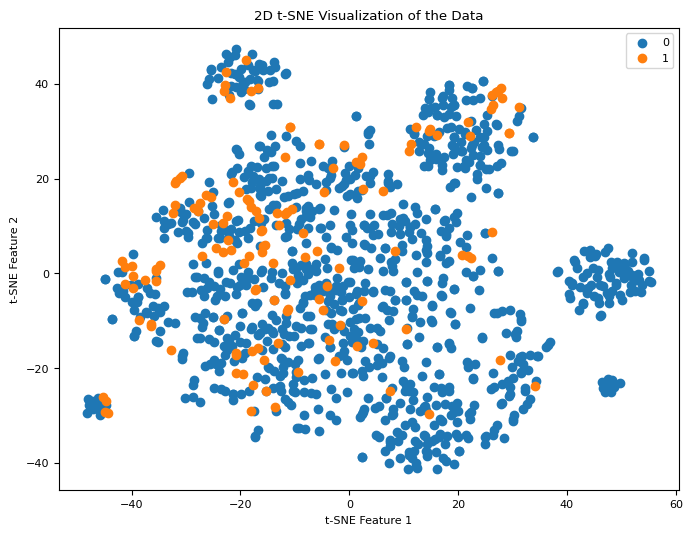

In [ ]:
from sklearn.manifold import TSNE

# T-SNE 수행
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(train_set.iloc[:,:])

# T-SNE 결과와 레이블을 데이터프레임에 추가
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Label'] = train_set_y.values

# 시각화
plt.figure(figsize=(8, 6))
for label in np.unique(df_tsne['Label']):
    plt.scatter(df_tsne[df_tsne['Label'] == label]['TSNE1'], df_tsne[df_tsne['Label'] == label]['TSNE2'], label=label)
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('2D t-SNE Visualization of the Data')
plt.legend()
plt.show()


## Class Imbalance

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# Random Oversampling
ros = RandomOverSampler(random_state=42)
train_set_ros, train_set_y_ros = ros.fit_resample(train_set, train_set_y)

# SMOTE
smote = SMOTE(random_state=42)
train_set_smote, train_set_y_smote = smote.fit_resample(train_set, train_set_y)

# ADASYN
adasyn = ADASYN(random_state=42)
train_set_adasyn, train_set_y_adasyn = adasyn.fit_resample(train_set, train_set_y)

# 결과 확인 (예시: 데이터 크기 출력)
print("Original:", train_set.shape, train_set_y.shape)
print("Random Oversampling:", train_set_ros.shape, train_set_y_ros.shape)
print("SMOTE:", train_set_smote.shape, train_set_y_smote.shape)
print("ADASYN:", train_set_adasyn.shape, train_set_y_adasyn.shape)

Original: (1173, 43) (1173,)
Random Oversampling: (2068, 43) (2068,)
SMOTE: (2068, 43) (2068,)
ADASYN: (2066, 43) (2066,)


### Data Augment 성능 평가

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# 결과를 저장할 딕셔너리
results = {}

# Orignal Data
# 정확도 계산
accuracy = np.mean(cross_val_score(lr, train_set, train_set_y, cv=5, scoring='accuracy'))
results[f"Original_accuracy"] = accuracy

# 재현율 계산
recall = np.mean(cross_val_score(lr, train_set, train_set_y, cv=5, scoring='recall'))
results[f"Original_recall"] = recall

# F1 점수 계산
f1 = np.mean(cross_val_score(lr, train_set, train_set_y, cv=5, scoring='f1'))
results[f"Original_f1"] = f1


# Random Oversampling
# 정확도 계산
scores = cross_val_score(lr, train_set_ros, train_set_y_ros, cv=5)
results[f"RandomOversampling_accuracy"] = np.mean(scores)

# 재현율 계산
recall = np.mean(cross_val_score(lr, train_set_ros, train_set_y_ros, cv=5, scoring='recall'))
results[f"RandomOversampling_recall"] = recall

# F1 점수 계산
f1 = np.mean(cross_val_score(lr, train_set_ros, train_set_y_ros, cv=5, scoring='f1'))
results[f"RandomOversampling_f1"] = f1


# SMOTE
# 정확도 계산
scores = cross_val_score(lr, train_set_smote, train_set_y_smote, cv=5)
results[f"SMOTE_accuracy"] = np.mean(scores)

# 재현율 계산
recall = np.mean(cross_val_score(lr, train_set_smote, train_set_y_smote, cv=5, scoring='recall'))
results[f"SMOTE_recall"] = recall

# F1 점수 계산
f1 = np.mean(cross_val_score(lr, train_set_smote, train_set_y_smote, cv=5, scoring='f1'))
results[f"SMOTE_f1"] = f1


# ADASYN
# 정확도 계산
scores = cross_val_score(lr, train_set_adasyn, train_set_y_adasyn, cv=5)
results[f"ADASYN_accuracy"] = np.mean(scores)

# 재현율 계산
recall = np.mean(cross_val_score(lr, train_set_adasyn, train_set_y_adasyn, cv=5, scoring='recall'))
results[f"ADASYN_recall"] = recall

# F1 점수 계산
f1 = np.mean(cross_val_score(lr, train_set_adasyn, train_set_y_adasyn, cv=5, scoring='f1'))
results[f"ADASYN_f1"] = f1

# 결과 출력
for i, (key, value) in enumerate(results.items()):
    print(f"{key}: {value}")
    # 빈 줄 추가
    if (i + 1) % 3 == 0:
        print()
    if (i + 1) % 12 == 0:
        print()

Original_accuracy: 0.9360720130932897
Original_recall: 0.6547619047619048
Original_f1: 0.702495319454254

RandomOversampling_accuracy: 0.9100653869998012
RandomOversampling_recall: 0.9352094179447492
RandomOversampling_f1: 0.9123223618814116

SMOTE_accuracy: 0.9173211215215638
SMOTE_recall: 0.9332629801604051
SMOTE_f1: 0.9186603702261105

ADASYN_accuracy: 0.9138435624802611
ADASYN_recall: 0.9321795412973124
ADASYN_f1: 0.9153525303861251




정확도 감소 $\to$ 적용 후 성능은 떨어짐

이후 모델링에서 오버샘플링을 사용하지 않는 것으로 결정

In [ ]:
# Augment 전 학습 모델
import statsmodels.api as sm

# statsmodels는 절편을 자동으로 추가하지 않으므로, 수동으로 추가
X_train_sm = sm.add_constant(train_set)

# 로지스틱 회귀 모델 생성 및 훈련
model = sm.Logit(train_set_y, X_train_sm)
result = model.fit(maxiter=500)

# 결과 요약 출력
print(result.summary())

         Current function value: 0.141633
         Iterations: 500
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1173
Model:                          Logit   Df Residuals:                     1133
Method:                           MLE   Df Model:                           39
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.6108
Time:                        15:47:42   Log-Likelihood:                -166.14
converged:                      False   LL-Null:                       -426.88
Covariance Type:            nonrobust   LLR p-value:                 1.116e-85
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -7.4432   1.19e+06  -6.25e-06      1.000   -2.33e+06    2.33e+06
A

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Augment 후 학습 모델
import statsmodels.api as sm

# statsmodels는 절편을 자동으로 추가하지 않으므로, 수동으로 추가
X_train_sm = sm.add_constant(train_set_smote)

# 로지스틱 회귀 모델 생성 및 훈련
model = sm.Logit(train_set_y_smote, X_train_sm)
result = model.fit(maxiter=500)

# 결과 요약 출력
print(result.summary())

         Current function value: 0.184423
         Iterations: 500
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 2068
Model:                          Logit   Df Residuals:                     2028
Method:                           MLE   Df Model:                           39
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.7339
Time:                        15:47:44   Log-Likelihood:                -381.39
converged:                      False   LL-Null:                       -1433.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -6.9943    1.9e+05  -3.68e-05      1.000   -3.72e+05    3.72e+05
A

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p-value 확인

## 최종 학습 데이터 선정

In [ ]:
# Train Data
train_set = train_set.copy()
train_set_y = train_set_y.copy()

# Or Train Data (SMOTE)
#train_set = train_set_smote.copy()
#train_set_y = train_set_y_smote.copy()

# Test Data
# test_set = test_set.copy()

In [ ]:
train_set['Attrition'] = train_set_y

train = train_set.copy()
test = test_set.copy()

print('Trainset의 SIZE : {}\n'.format(train.shape[0]))
print('Testset의 SIZE : {}\n'.format(test.shape[0]))

Trainset의 SIZE : 1173

Testset의 SIZE : 503





---


#EDA

## Histogram

### 연속형 변수들

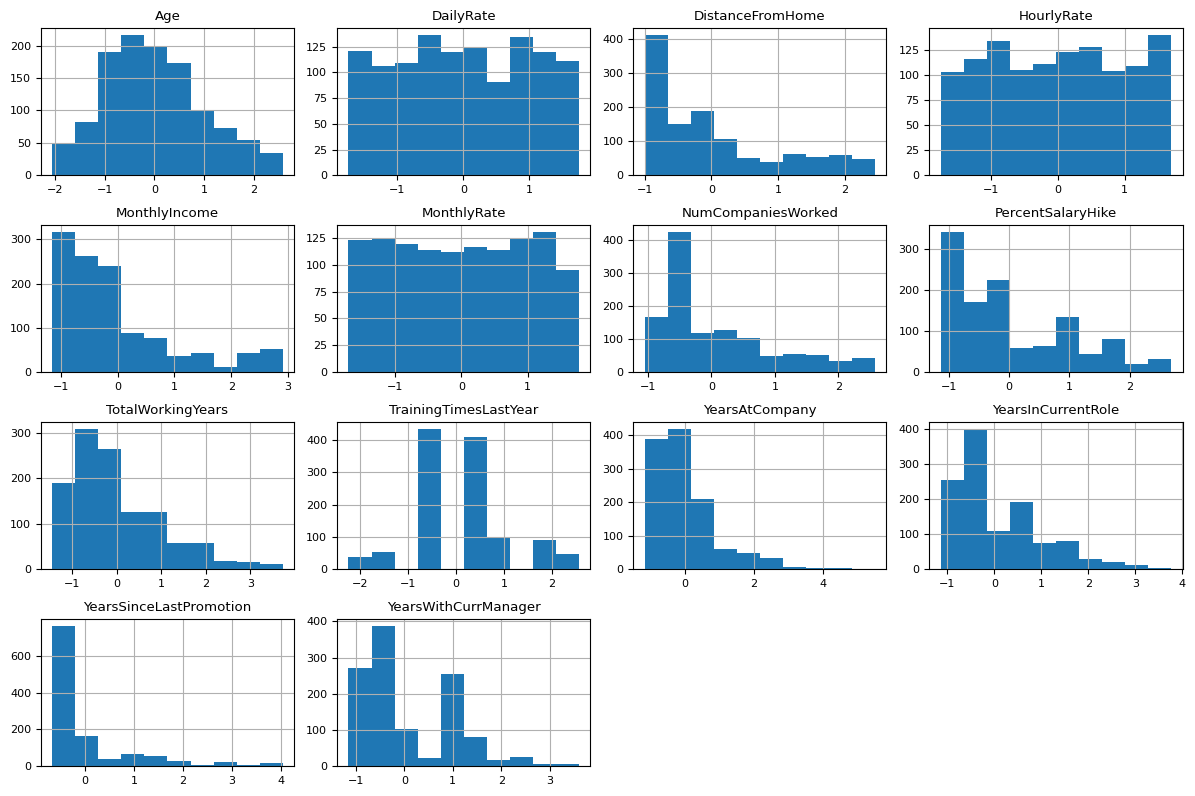

In [ ]:
plt.rc('font', size=8)
# nunique가 6개 이상인 column만 선택
columns_to_plot = [col for col in train.columns if train[col].nunique() >= 6]
train[columns_to_plot].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

### 이산형 변수들

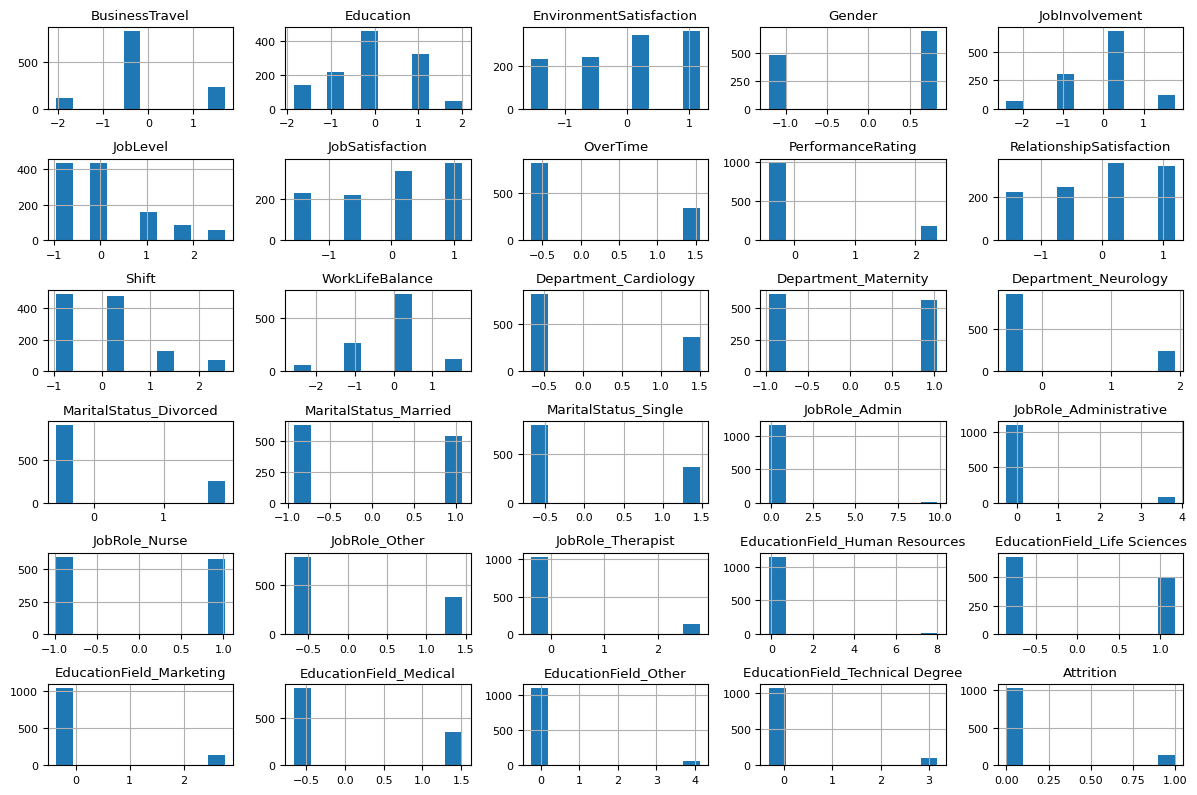

In [ ]:
plt.rc('font', size=8)
# nunique가 6개 미만인 column만 선택
columns_to_plot = [col for col in train.columns if train[col].nunique() < 6]
train[columns_to_plot].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

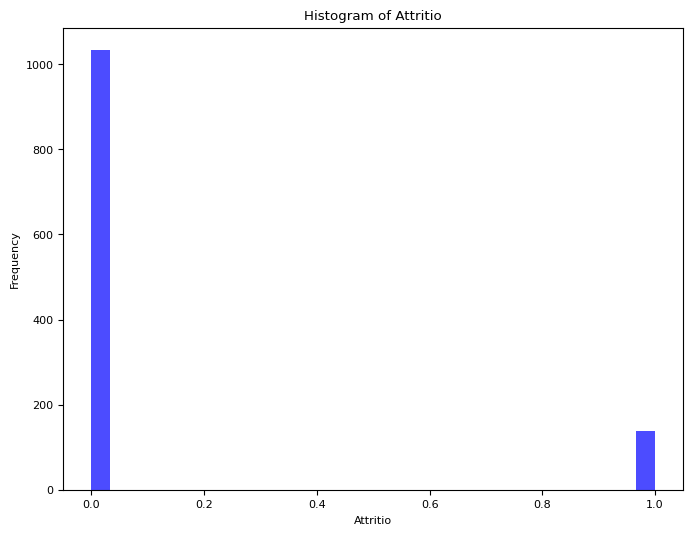

In [ ]:
# 'price' 컬럼의 히스토그램
plt.figure(figsize=(8, 6))
plt.hist(train['Attrition'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Attritio')
plt.xlabel('Attritio')
plt.ylabel('Frequency')
plt.show()

## Pie Chart

Cardinality가 가장 컸던 Education의 Pie Chart

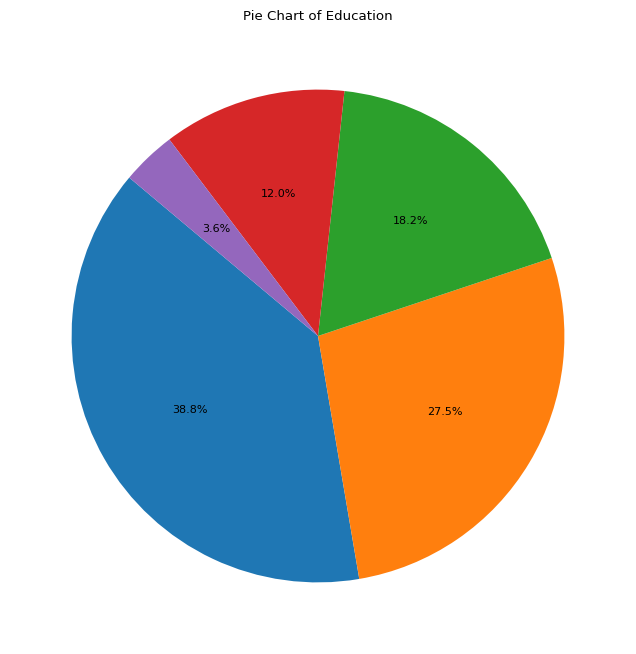

In [ ]:
# 'Education' 컬럼의 파이 차트 (필요 없을듯)
Education_counts = train['Education'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Education_counts, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Education')
plt.show()

## BoxPlot

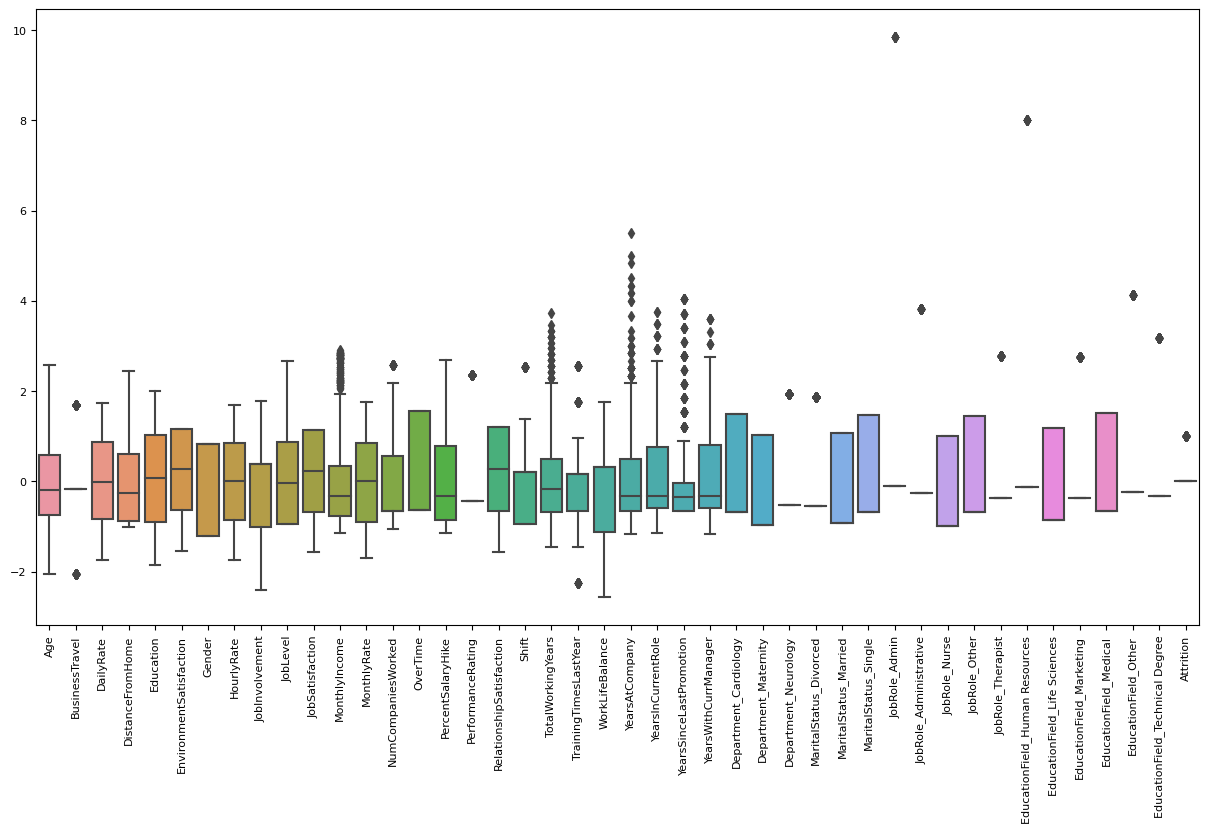

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data = train.iloc[:,:])
plt.xticks(rotation=90)
plt.show()

## Kernel Graph

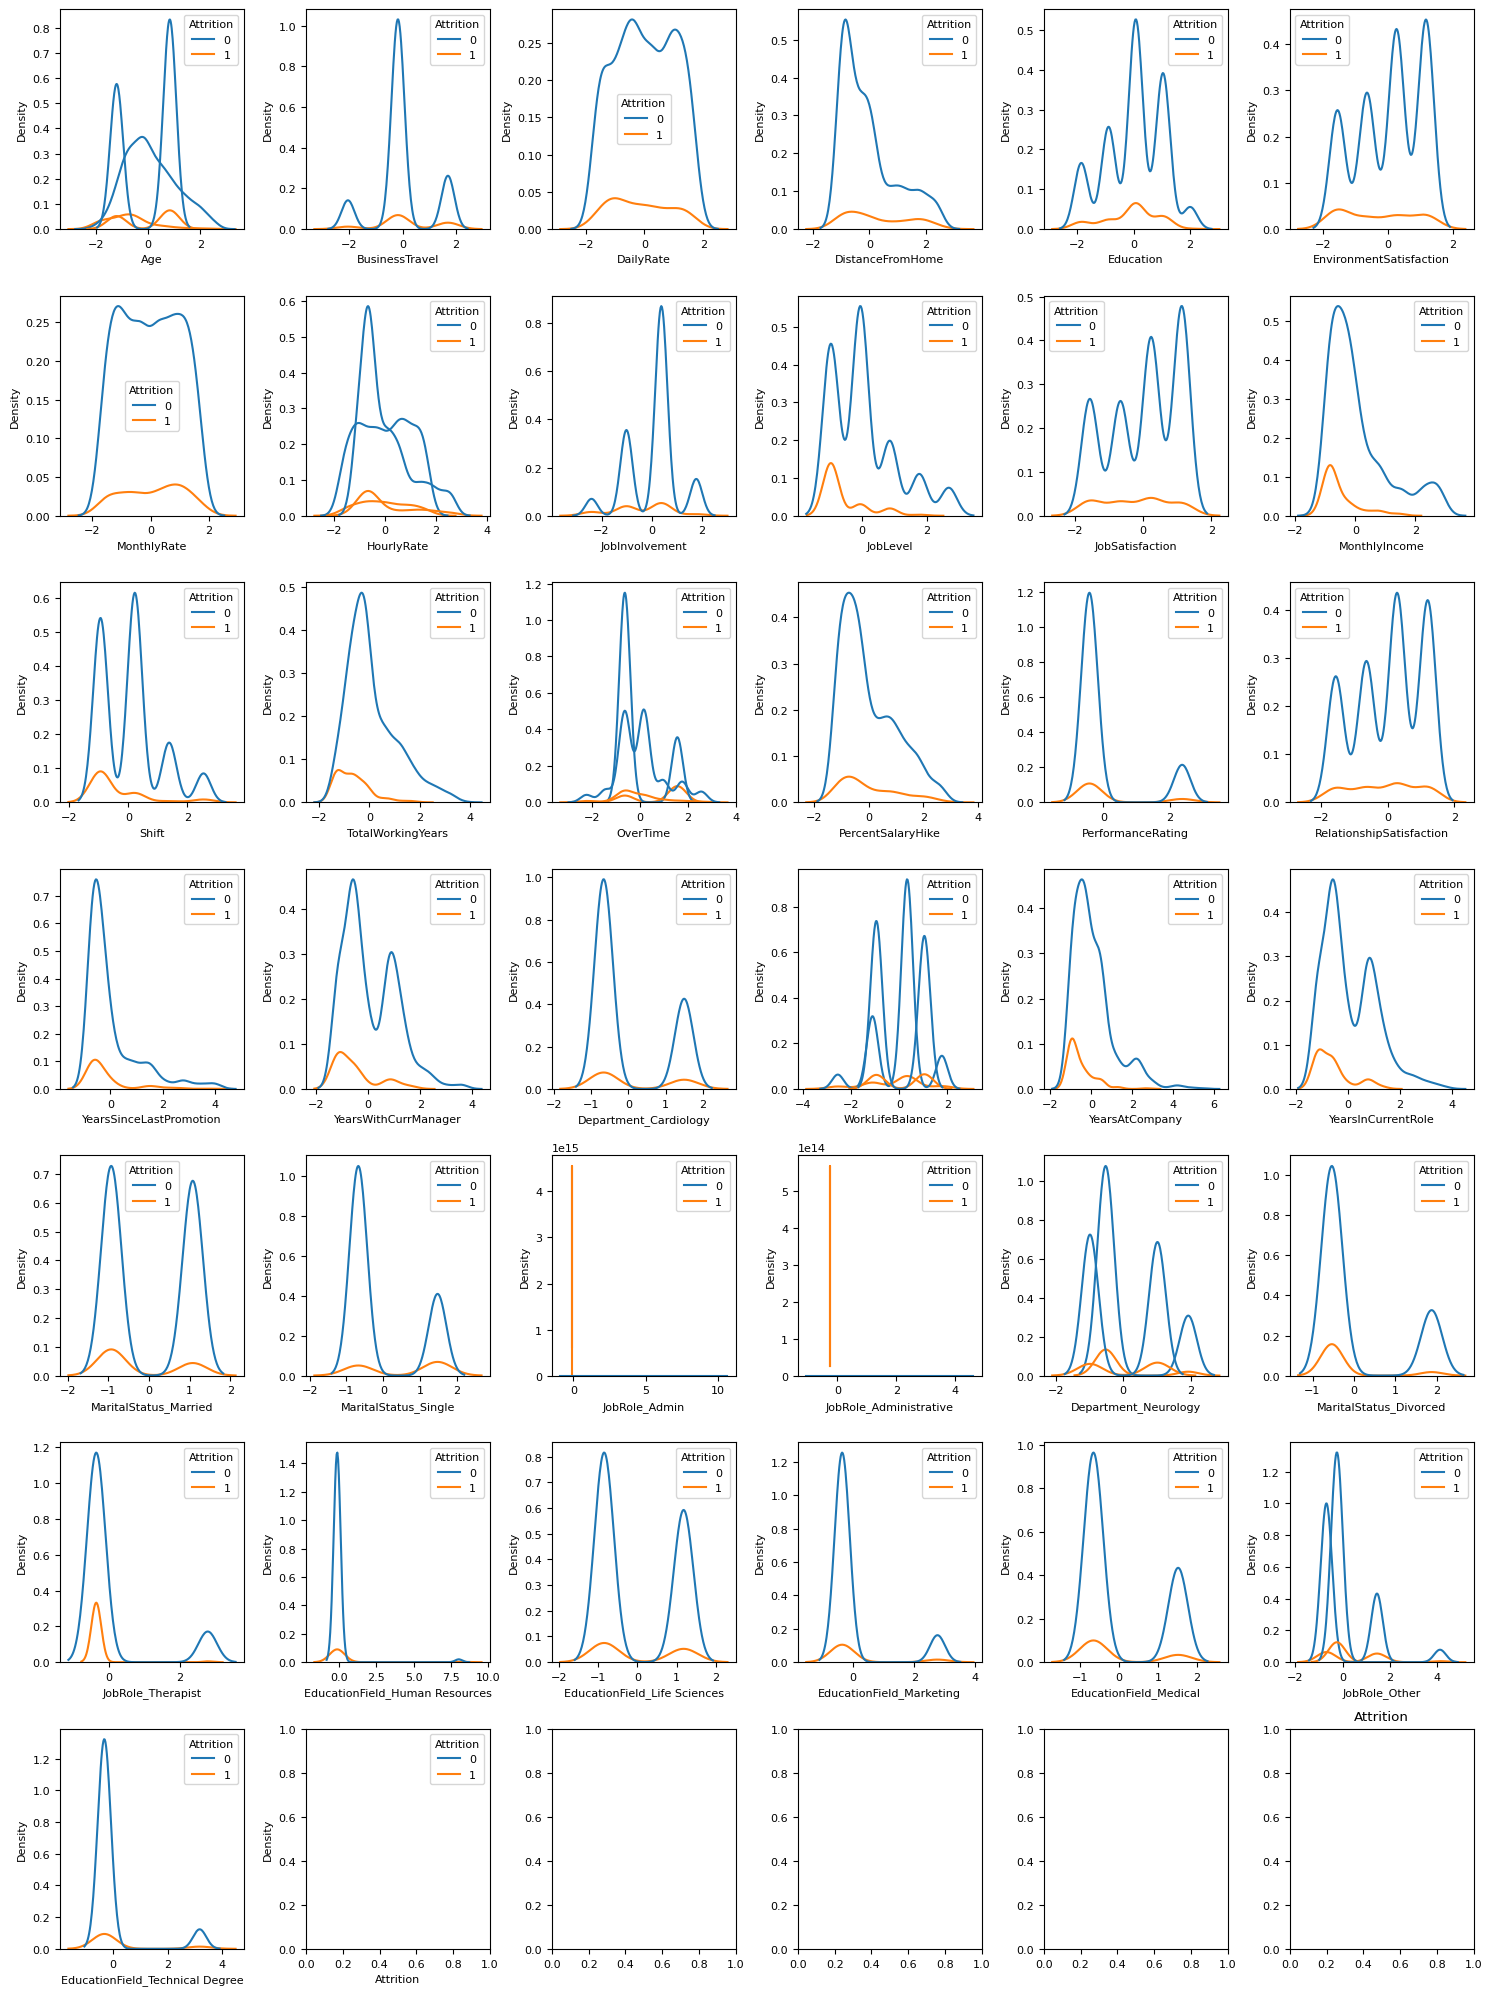

In [ ]:
fig, axes = plt.subplots(7, 6, figsize=(15, 20))

for i, f in enumerate(train.columns):
    row = i // 7  # Row index
    col = i % 6  # Column index
    sns.kdeplot(x=f,data=train,hue='Attrition', ax=axes[row, col])
    plt.title(f)
plt.tight_layout()
plt.show()

## HeatMap

연속형 변수들에 대한 HeatMap

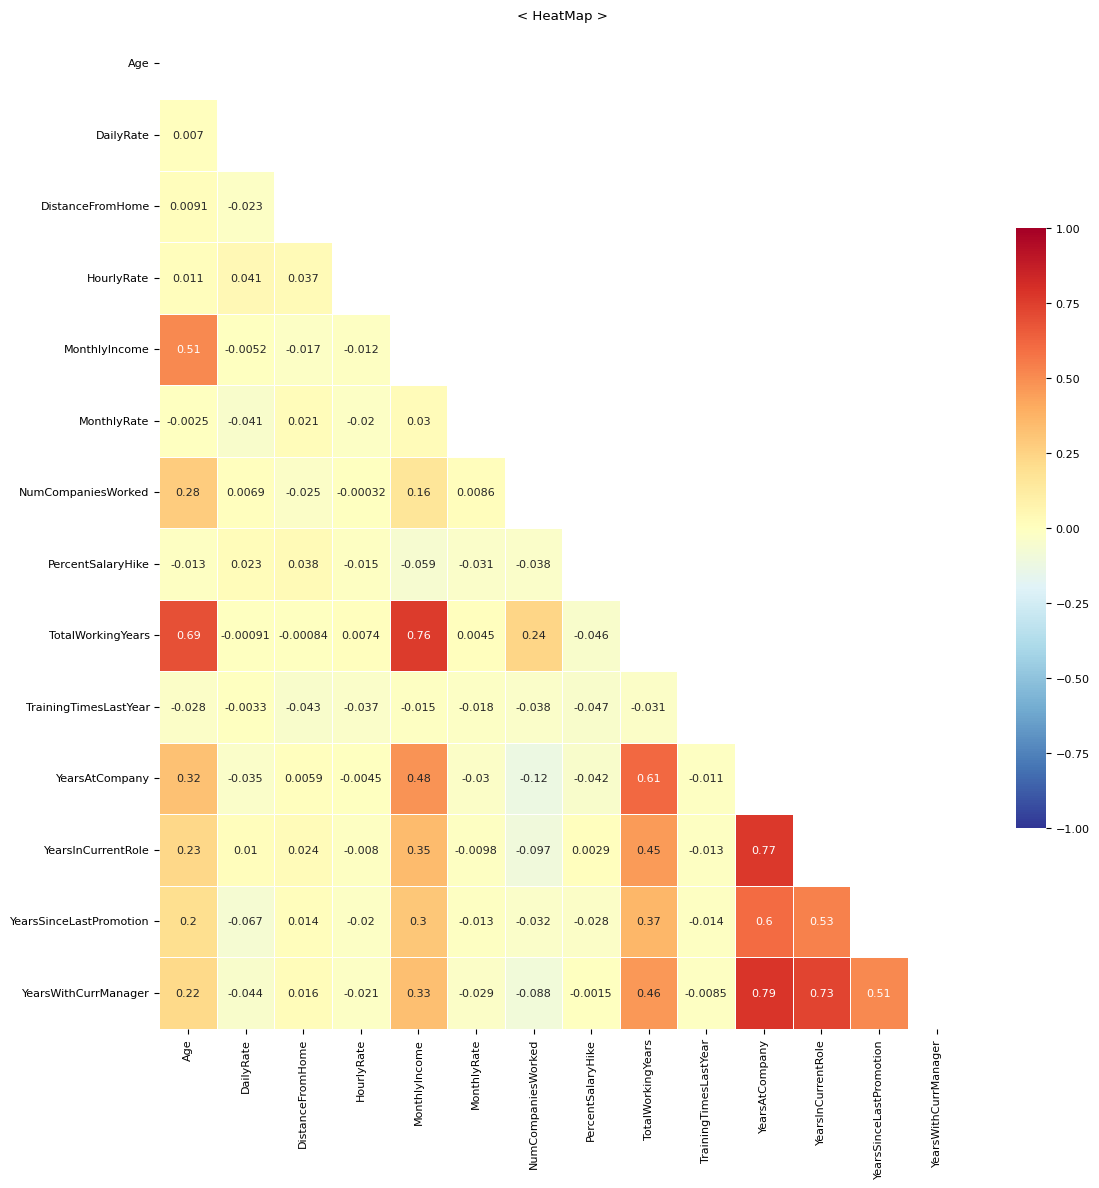

In [ ]:
# 상관계수에 따른 HeatMap
#plt.rc('font', size=5)

non_cat = [col for col in train.columns if train[col].nunique() >= 6]

corr_df = train[non_cat].corr() # 상관계수
fig, ax = plt.subplots(figsize=(13,13))

mask = np.zeros_like(corr_df, dtype=np.bool) # 삼각형 마스크
mask[np.triu_indices_from(mask)] = True
plt.title('< HeatMap >')
sns.heatmap(corr_df, # 히트맵
            cmap = 'RdYlBu_r',
            annot = True,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .6},
            vmin = -1.0, vmax = 1.0)
plt.show()

##PairPlot

###상관관계 상위 16개

In [ ]:
corr_matrix = train[non_cat].corr()

top_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                .stack()
                .sort_values(ascending=False))
top_corr = top_corr.head(16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, (columns, corr_value) in enumerate(top_corr.items()):
    ax = axes[i // 4, i % 4]
    sns.scatterplot(x=train[columns[0]], y=train[columns[1]], ax=ax)
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_title(f'Correlation: {corr_value:.2f}')

plt.tight_layout()
plt.show()

### 상관관계 하위 16개

In [ ]:
corr_matrix = train[non_cat].corr()

bot_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                .stack()
                .sort_values(ascending=False))
bot_corr = bot_corr.tail(16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, (columns, corr_value) in enumerate(bot_corr.items()):
    ax = axes[i // 4, i % 4]
    sns.scatterplot(x=train[columns[0]], y=train[columns[1]], ax=ax)
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_title(f'Correlation: {corr_value:.2f}')

plt.tight_layout()
plt.show()



---



# Model



## 평균적인 모델 성능 비교

In [ ]:
# train
train = train.drop(columns='Attrition')
train_y = train_set_y.copy()

# test
test_y = test_set_y

LR, LR(Ridge), LR(Lasso), LR(Elastic), SVM, NaiveBayes 6개 모델의 평균적인 성능 (cross-validation)

In [ ]:
# 5fold cross-validation

from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


# 결과를 저장할 딕셔너리
results = {}

# 모델 리스트
models = [
    ("LogisticRegression", LogisticRegression(penalty=None)),
    ("LogisticRegression_Lasso", LogisticRegression(penalty='l1', solver='liblinear')),
    ("LogisticRegression_Ridge", LogisticRegression(penalty='l2')),
    ("LogisticRegression_ElasticNet", LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')),
    ("SVM", SVC()),
    ("NaiveBayes", GaussianNB())
]


# 각 모델에 대해 교차 검증 수행
for model_name, model in models:
    # 정확도 계산
    accuracy = np.mean(cross_val_score(model, train, train_y, cv=5, scoring='accuracy'))
    results[f"{model_name}_accuracy"] = accuracy

    # 재현율 계산
    recall = np.mean(cross_val_score(model, train, train_y, cv=5, scoring='recall'))
    results[f"{model_name}_recall"] = recall

    # 정밀도 계산
    precision = np.mean(cross_val_score(model, train, train_y, cv=5, scoring='precision'))
    results[f"{model_name}_precision"] = precision

    # F1 점수 계산
    f1 = np.mean(cross_val_score(model, train, train_y, cv=5, scoring='f1'))
    results[f"{model_name}_f1"] = f1


# 결과 출력
line_count = 0
for key, value in results.items():
    print(f"{key}: {value}")
    line_count += 1
    if line_count % 4 == 0:
        print()


LogisticRegression_accuracy: 0.9369267139479905
LogisticRegression_recall: 0.6619047619047619
LogisticRegression_precision: 0.7717037037037037
LogisticRegression_f1: 0.7069397638986985

LogisticRegression_Lasso_accuracy: 0.9343698854337152
LogisticRegression_Lasso_recall: 0.6404761904761905
LogisticRegression_Lasso_precision: 0.7674965935835502
LogisticRegression_Lasso_f1: 0.6930243612596554

LogisticRegression_Ridge_accuracy: 0.9360720130932897
LogisticRegression_Ridge_recall: 0.6547619047619048
LogisticRegression_Ridge_precision: 0.7702792022792023
LogisticRegression_Ridge_f1: 0.702495319454254

LogisticRegression_ElasticNet_accuracy: 0.9352209492635024
LogisticRegression_ElasticNet_recall: 0.6476190476190476
LogisticRegression_ElasticNet_precision: 0.7689458689458689
LogisticRegression_ElasticNet_f1: 0.697850907262672

SVM_accuracy: 0.9096272049463539
SVM_recall: 0.31613756613756616
SVM_precision: 0.7966666666666666
SVM_f1: 0.4488787073487196

NaiveBayes_accuracy: 0.3614802691398436

##성능 평가 함수 정의

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

def logit_eval(label, pred, str) :
    plt.figure() # 새로운 그래프 창 생성
    plt.rc('font', size=15)
    con_mat = confusion_matrix(label.values, pred)

    sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
                xticklabels=['NO [0]', 'Yes [1]'],
                yticklabels=['NO [0]', 'Yes [1]'],
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    print(str+" accuracy: ", accuracy_score(label.values, pred))
    print(str+" recall: ", round(recall_score(label.values, pred),3))
    print(str+" precision: ", round(precision_score(label.values, pred),3))
    print(str+" f1-score: ", round(f1_score(label.values, pred),3))
    print()

## Logistic Regression

### 기본 모델

In [ ]:
import statsmodels.api as sm

# statsmodels는 절편을 자동으로 추가하지 않으므로, 수동으로 추가
X_train_sm = sm.add_constant(train)
X_test_sm = sm.add_constant(test)

# 로지스틱 회귀 모델 생성 및 훈련
model = sm.Logit(train_y, X_train_sm)
result = model.fit(maxiter=1000)
pred_test = result.predict(X_test_sm)
pred_train = result.predict(X_train_sm)

# 결과 요약 출력
print(result.summary())

         Current function value: 0.141633
         Iterations: 1000
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1173
Model:                          Logit   Df Residuals:                     1133
Method:                           MLE   Df Model:                           39
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.6108
Time:                        15:48:23   Log-Likelihood:                -166.14
converged:                      False   LL-Null:                       -426.88
Covariance Type:            nonrobust   LLR p-value:                 1.116e-85
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -7.3454   1.15e+06  -6.38e-06      1.000   -2.26e+06    2.26e+06


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Train 성능 (적합도)

Train accuracy:  0.9462915601023018
Train recall:  0.698
Train precision:  0.822
Train f1-score:  0.755



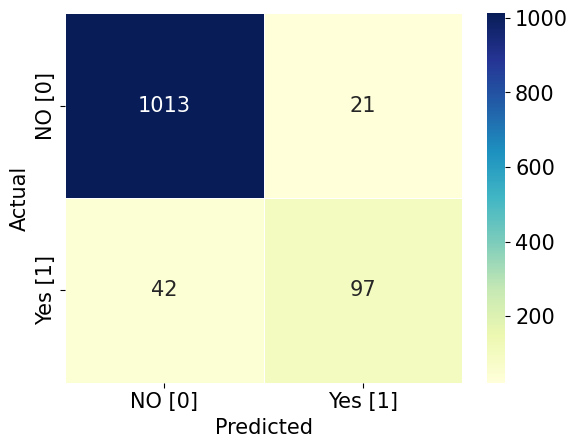

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')

#### Test 성능

Test accuracy:  0.9244532803180915
Test recall:  0.567
Test precision:  0.739
Test f1-score:  0.642



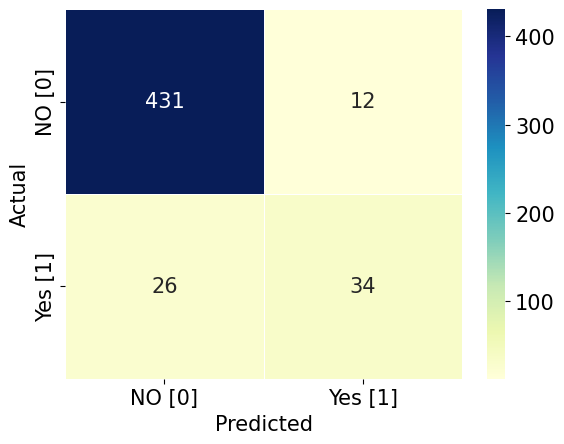

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')

### 다중공선성 확인

#### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = train.columns
vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

# vif가 8보다 큰 다중공선성 유발 column list
vif_data[vif_data['VIF']>8]

feature        VIF
9                          JobLevel  13.177143
11                    MonthlyIncome  13.691966
26            Department_Cardiology        inf
27             Department_Maternity        inf
28             Department_Neurology        inf
29           MaritalStatus_Divorced        inf
30            MaritalStatus_Married        inf
31             MaritalStatus_Single        inf
32                    JobRole_Admin        inf
33           JobRole_Administrative        inf
34                    JobRole_Nurse        inf
35                    JobRole_Other        inf
36                JobRole_Therapist        inf
37   EducationField_Human Resources        inf
38     EducationField_Life Sciences        inf
39         EducationField_Marketing        inf
40           EducationField_Medical        inf
41             EducationField_Other        inf
42  EducationField_Technical Degree        inf

#### CI

In [ ]:
from numpy.linalg import eig

# 설명 변수(독립 변수) 행렬
X = train.values

# X의 공분산 행렬
cov_matrix = np.cov(X, rowvar=False)

# 공분산 행렬의 고유값 계산
eigenvalues, _ = eig(cov_matrix)

# 가장 큰 고유값
max_eigenvalue = np.max(eigenvalues)

# 조건 지수 계산
condition_indices = np.sqrt(max_eigenvalue / eigenvalues)

# 결과 저장
ci_data = pd.DataFrame()
ci_data["feature"] = train.columns
ci_data["Condition_Index"] = condition_indices

# ci가 30보다 큰 다중공선성 유발 column list
ci_data[ci_data['Condition_Index']>=30]

feature  Condition_Index
39  EducationField_Marketing     4.582696e+07
41      EducationField_Other     8.763508e+07

In [ ]:
# 다중공선성을 야기할 수 있는 column 목록 추출
ci_col = ci_data[ci_data['Condition_Index']>=30]['feature'].values
vif_col = vif_data[vif_data['VIF']>8]['feature'].values

# p-val 0.045 이상
high_p_val = list(result.pvalues[result.pvalues >= 0.045].index)
high_p_val = high_p_val+['Department_Cardiology','Department_Maternity','Department_Neurology','EducationField_Human Resources','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other','EducationField_Technical Degree']
high_p_val.remove('const')

# ci_col과 vif_col, high_p_val의 합집합 생성
drop_features = set(vif_col).union(set(high_p_val)).union(set(ci_col))

# 합집합을 리스트로 변환
drop_features_list = list(drop_features)

### Feature Selection (후진 소거법)

p-value, VIF, CI가 모두 정상인 경우는 가만히 두고, 문제가 될만한 column들에 대해서만 후진 소거법을 적용 (model의 p-value 모니터링)

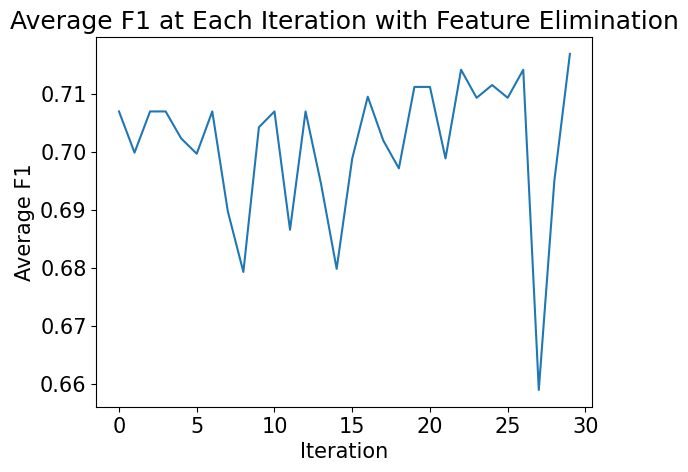

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def backward_feature_elimination(X, y, drop_features_list, cv=5):
    remaining_features = drop_features_list.copy()  # 제거 대상 특성들
    all_features = X.columns.tolist()  # 전체 특성 목록
    f1_scores_history = []
    best_f1_score = np.mean(cross_val_score(LogisticRegression(penalty='none'), X[all_features], y, cv=cv, scoring='f1'))
    best_feature_set = all_features.copy()

    remove_feature_set = []

    for feature in remaining_features:
        current_features = [x for x in best_feature_set if x != feature]
        model = LogisticRegression(penalty='none')

        f1_scores = cross_val_score(model, X[current_features], y, cv=cv, scoring='f1')
        avg_f1_score = np.mean(f1_scores)
        f1_scores_history.append(avg_f1_score)

        # 최대 F1 점수와 해당하는 특성 집합 업데이트
        if avg_f1_score < best_f1_score:
            current_features.append(feature)
            best_feature_set = current_features.copy()

        else :
            remove_feature_set.append(feature)
            best_f1_score = avg_f1_score
            best_feature_set.remove(feature)

    # F1 점수 변화 그래프 그리기
    plt.plot(f1_scores_history)
    plt.xlabel('Iteration')
    plt.ylabel('Average F1')
    plt.title('Average F1 at Each Iteration with Feature Elimination')
    plt.show()

    return best_feature_set, remove_feature_set

# 함수 실행 및 그래프 출력
selected_features, removed_features = backward_feature_elimination(train, train_y, drop_features_list)

In [ ]:
# Selected
selected_features

['Age',
 'BusinessTravel',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'OverTime',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'JobRole_Therapist',
 'YearsAtCompany',
 'JobRole_Administrative',
 'EducationField_Life Sciences',
 'EducationField_Technical Degree',
 'JobRole_Nurse',
 'JobLevel',
 'RelationshipSatisfaction',
 'MaritalStatus_Divorced',
 'EducationField_Human Resources',
 'EducationField_Marketing',
 'Department_Cardiology',
 'Gender',
 'DailyRate',
 'EducationField_Other',
 'JobRole_Admin',
 'MaritalStatus_Married',
 'Shift']

In [ ]:
# Removed
removed_features

['JobRole_Other',
 'MonthlyIncome',
 'EducationField_Medical',
 'Department_Neurology',
 'MaritalStatus_Single',
 'PerformanceRating',
 'HourlyRate',
 'MonthlyRate',
 'PercentSalaryHike',
 'TrainingTimesLastYear',
 'Education',
 'Department_Maternity']

In [ ]:
# 후진 소거법 적용 후 특성
selected_train = train[selected_features]
selected_test = test[selected_features]

import statsmodels.api as sm

# statsmodels는 절편을 자동으로 추가하지 않으므로, 수동으로 추가
X_train_sm = sm.add_constant(selected_train)
X_test_sm = sm.add_constant(selected_test)

# 로지스틱 회귀 모델 생성 및 훈련
model = sm.Logit(train_y, X_train_sm)
result = model.fit(maxiter=20)
pred_test = result.predict(X_test_sm)
pred_train = result.predict(X_train_sm)

# 결과 요약 출력
print(result.summary())

         Current function value: 0.143712
         Iterations: 20
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1173
Model:                          Logit   Df Residuals:                     1141
Method:                           MLE   Df Model:                           31
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.6051
Time:                        16:10:17   Log-Likelihood:                -168.57
converged:                      False   LL-Null:                       -426.88
Covariance Type:            nonrobust   LLR p-value:                 1.966e-89
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -6.5895    231.196     -0.029      0.977    -459.726     446.547
Ag

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Selection 이후 Train (적합도)

Train accuracy:  0.9437340153452686
Train recall:  0.691
Train precision:  0.807
Train f1-score:  0.744



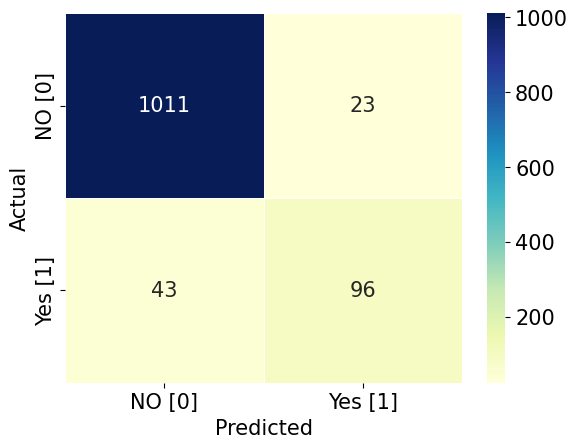

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')

#### Selection 이후 Test

Test accuracy:  0.9244532803180915
Test recall:  0.583
Test precision:  0.729
Test f1-score:  0.648



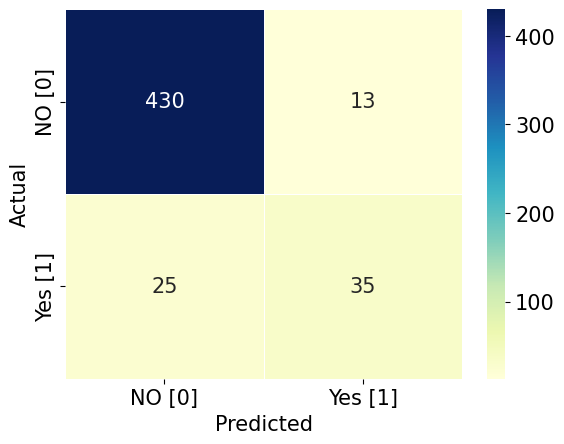

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')



---




## Lasso

### 기본 모델

In [ ]:
lr = LogisticRegression(penalty='l1', solver='liblinear')

lr.fit(selected_train, train_y)

pred_test = lr.predict(selected_test)
pred_train = lr.predict(selected_train)

#### Train 성능 (적합도)

Train accuracy:  0.9437340153452686
Train recall:  0.662
Train precision:  0.829
Train f1-score:  0.736



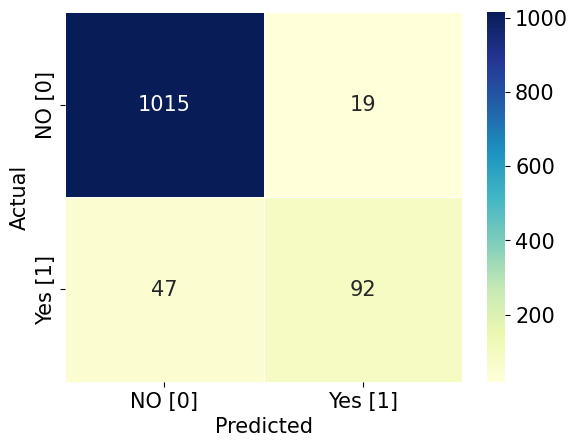

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')

#### Test 성능

Test accuracy:  0.9264413518886679
Test recall:  0.567
Test precision:  0.756
Test f1-score:  0.648



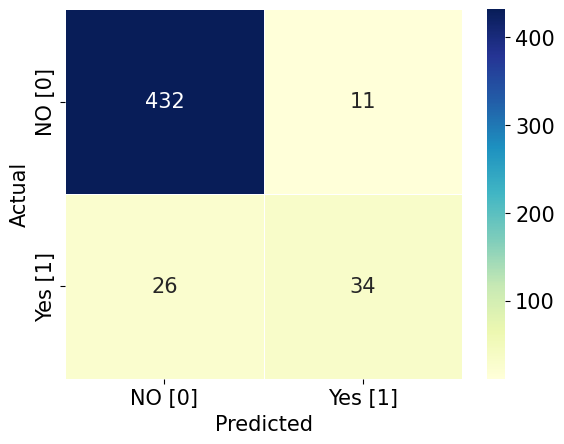

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')

### Hyperparameter Tuning (베이지안 최적화 CV)

In [ ]:
# 진행 상황을 추적하기 위한 tqdm 콜백
class TqdmCallback:
    def __init__(self, total):
        self.progress_bar = tqdm(total=total)

    def __call__(self, res):
        self.progress_bar.update(1)

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from tqdm import tqdm

# 모델 정의
lr = LogisticRegression(penalty='l1', solver='liblinear')

# 베이지안 최적화를 위한 파라미터 공간 정의
param_space  = {
    'C': Real(0.001, 10, prior='log-uniform'),
    'solver': Categorical(['liblinear', 'saga']),
    'tol': Real(1e-6, 1e-3, prior='log-uniform')
}

# BayesSearchCV 객체 생성
opt_lr_lasso = BayesSearchCV(
    lr,
    param_space,
    n_iter=100,
    random_state=42,
    scoring='recall'
)

# 콜백 생성
tqdm_callback = TqdmCallback(total=100)

# 최적화 수행
opt_lr_lasso.fit(selected_train, train_y, callback=[tqdm_callback])

# 최적의 파라미터와 점수 출력
print()
print("Best parameters: ", opt_lr_lasso.best_params_)
print("Best score: ", opt_lr_lasso.best_score_)

100%|██████████| 100/100 [05:12<00:00,  5.59s/it]


Best parameters:  OrderedDict([('C', 2.2364202820542705), ('solver', 'saga'), ('tol', 8.132617181090025e-06)])
Best score:  0.6473544973544973


#### Hyperparameter Tuning 시각화

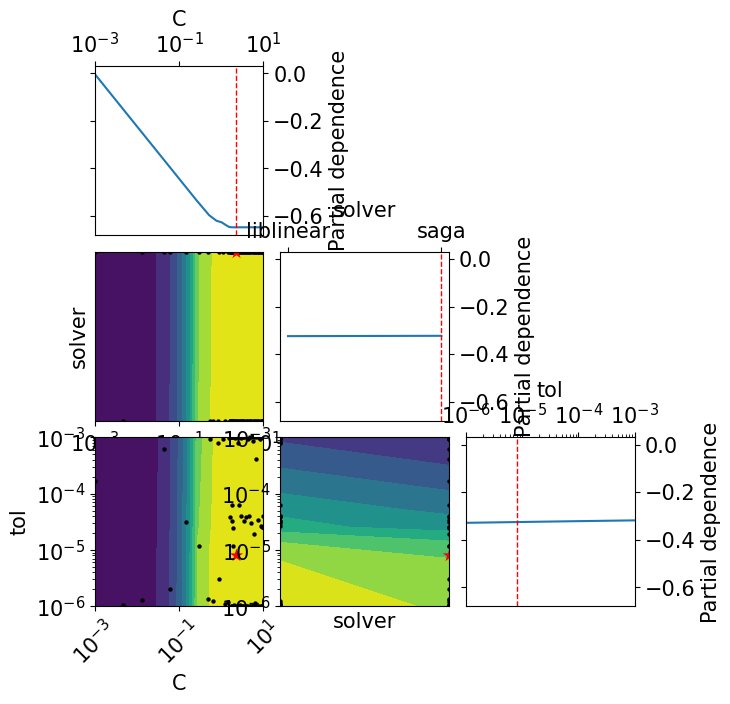

In [ ]:
import matplotlib.pyplot as plt
from skopt.plots import plot_convergence, plot_objective, plot_evaluations

# 목적 함수에 대한 하이퍼파라미터의 영향을 시각화
plot_objective(opt_lr_lasso.optimizer_results_[0])
plt.show()


In [ ]:
lr = LogisticRegression(penalty='l1', **opt_lr_lasso.best_params_)

lr.fit(selected_train, train_y)

pred_train = lr.predict(selected_train)
pred_test = lr.predict(selected_test)

#### Tuning 이후 Train 성능

Train accuracy:  0.9437340153452686
Train recall:  0.676
Train precision:  0.817
Train f1-score:  0.74



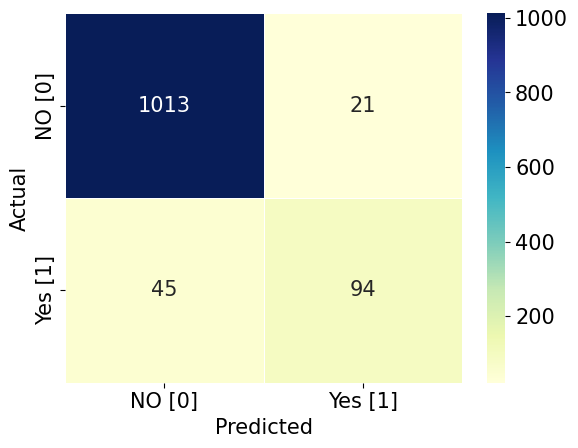

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')

#### Tuning 이후 Test 성능

Test accuracy:  0.9244532803180915
Test recall:  0.567
Test precision:  0.739
Test f1-score:  0.642



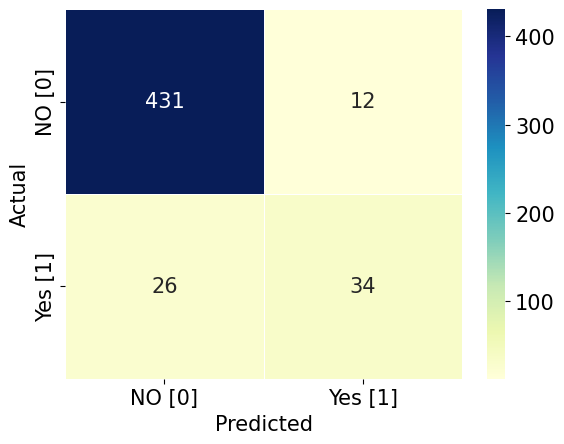

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')



---



## Ridge

### 기본 모델

In [ ]:
lr = LogisticRegression(penalty='l2')

lr.fit(selected_train, train_y)

pred_test = lr.predict(selected_test)
pred_train = lr.predict(selected_train)

### Train 성능 (적합도)

Train accuracy:  0.9445865302642796
Train recall:  0.669
Train precision:  0.83
Train f1-score:  0.741



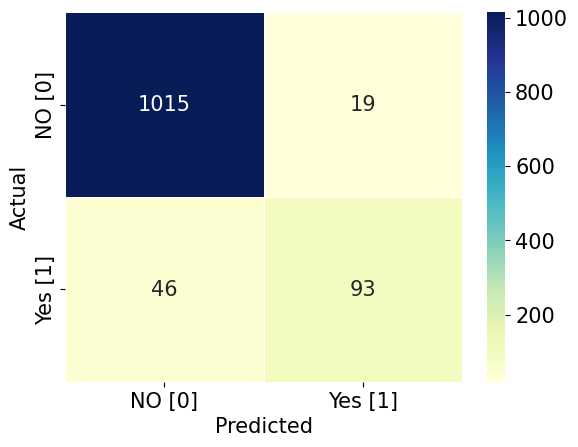

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')

### Test 성능

Test accuracy:  0.9264413518886679
Test recall:  0.567
Test precision:  0.756
Test f1-score:  0.648



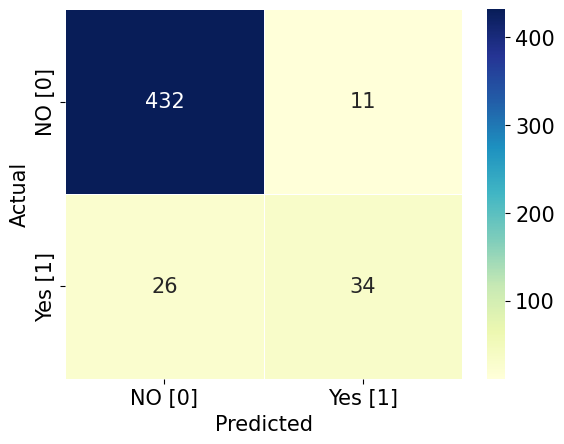

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')

### Hyperparameter Tuning

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from tqdm import tqdm

# 모델 정의
lr = LogisticRegression(penalty='l2')

# 베이지안 최적화를 위한 파라미터 공간 정의
param_space  = {
    'C': Real(0.001, 10, prior='log-uniform'),
    'solver': Categorical(['liblinear', 'saga']),
    'tol': Real(1e-6, 1e-3, prior='log-uniform')
}

# BayesSearchCV 객체 생성
opt_lr_ridge = BayesSearchCV(
    lr,
    param_space,
    n_iter=100,
    random_state=42,
    scoring='recall'
)

# 콜백 생성
tqdm_callback = TqdmCallback(total=100)

# 최적화 수행
opt_lr_ridge.fit(selected_train, train_y, callback=[tqdm_callback])

# 최적의 파라미터와 점수 출력
print()
print("Best parameters: ", opt_lr_ridge.best_params_)
print("Best score: ", opt_lr_ridge.best_score_)


100%|██████████| 100/100 [04:59<00:00,  5.77s/it]


Best parameters:  OrderedDict([('C', 1.7765766649807682), ('solver', 'liblinear'), ('tol', 6.225026900894051e-05)])
Best score:  0.6473544973544973


#### Hyperparameter Tuning 시각화

In [ ]:
import matplotlib.pyplot as plt
from skopt.plots import plot_convergence, plot_objective, plot_evaluations

# 목적 함수에 대한 하이퍼파라미터의 영향을 시각화
plot_objective(opt_lr_ridge.optimizer_results_[0])
plt.show()

In [ ]:
lr = LogisticRegression(penalty='l2',**opt_lr_ridge.best_params_)

lr.fit(selected_train, train_y)

pred_train = lr.predict(selected_train)
pred_test = lr.predict(selected_test)

#### Tuning 이후 Train 성능

Train accuracy:  0.9437340153452686
Train recall:  0.676
Train precision:  0.817
Train f1-score:  0.74



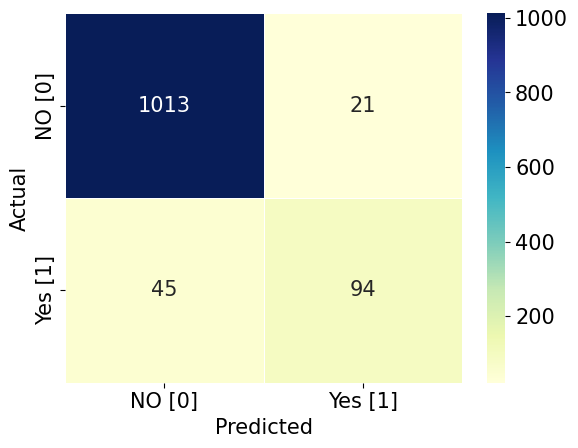

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')

####  Tuning 이후 Test 성능

Test accuracy:  0.9244532803180915
Test recall:  0.567
Test precision:  0.739
Test f1-score:  0.642



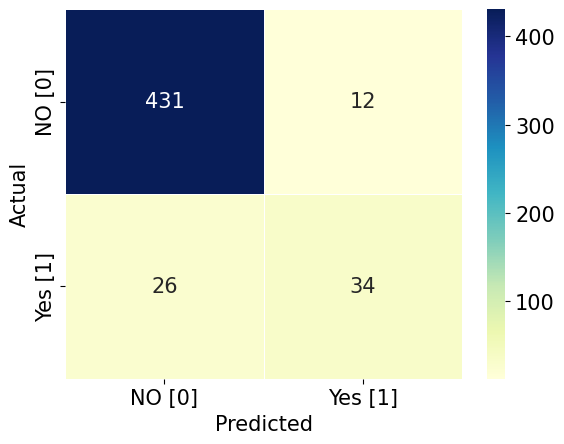

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')



---



## ElasticNet

### 기본 모델

In [ ]:
lr = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

lr.fit(selected_train, train_y)

pred_test = lr.predict(selected_test)
pred_train = lr.predict(selected_train)

### Train 성능 (적합도)

Train accuracy:  0.9445865302642796
Train recall:  0.669
Train precision:  0.83
Train f1-score:  0.741



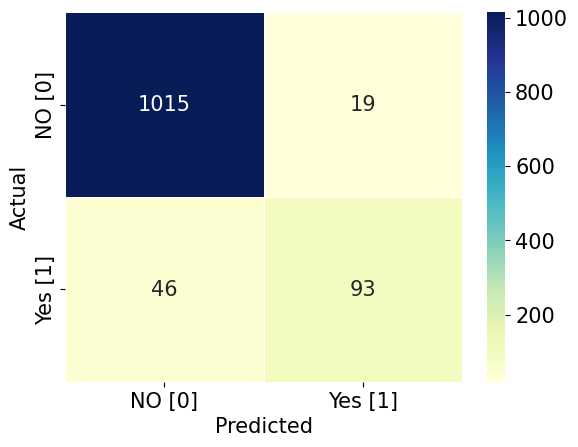

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')

###Test 성능

Test accuracy:  0.9264413518886679
Test recall:  0.567
Test precision:  0.756
Test f1-score:  0.648



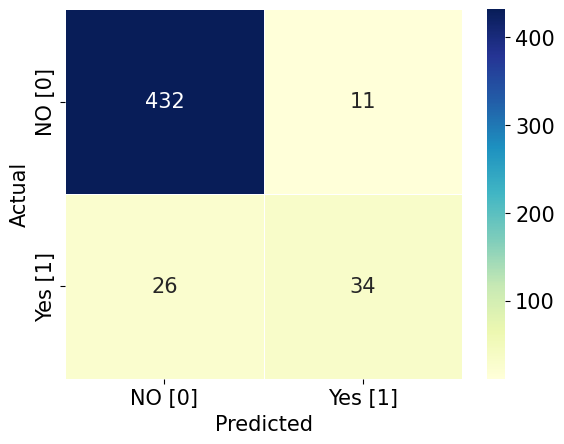

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')

###Hyperparameter Tuning

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from tqdm import tqdm

# 모델 정의
lr = LogisticRegression(penalty='elasticnet', solver='saga')

# 베이지안 최적화를 위한 파라미터 공간 정의
param_space  = {
    'C': Real(0.001, 10, prior='log-uniform'),
    'l1_ratio': Real(0, 1, prior='uniform'),
    'tol': Real(1e-6, 1e-3, prior='log-uniform')
}


# BayesSearchCV 객체 생성
opt_lr_elastic = BayesSearchCV(
    lr,
    param_space,
    n_iter=100,
    random_state=42,
    scoring='recall'
)

# 콜백 생성
tqdm_callback = TqdmCallback(total=100)

# 최적화 수행
opt_lr_elastic.fit(selected_train, train_y, callback=[tqdm_callback])

# 최적의 파라미터와 점수 출력
print()
print("Best parameters: ", opt_lr_elastic.best_params_)
print("Best score: ", opt_lr_elastic.best_score_)



  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:12,  8.21it/s]

  2%|▏         | 2/100 [00:00<00:25,  3.88it/s]

  3%|▎         | 3/100 [00:00<00:26,  3.66it/s]

  4%|▍         | 4/100 [00:01<00:28,  3.35it/s]

  5%|▌         | 5/100 [00:01<00:29,  3.20it/s]

  6%|▌         | 6/100 [00:01<00:30,  3.05it/s]

  7%|▋         | 7/100 [00:02<00:31,  2.98it/s]

  8%|▊         | 8/100 [00:02<00:29,  3.16it/s]

  9%|▉         | 9/100 [00:02<00:30,  3.01it/s]

 10%|█         | 10/100 [00:04<00:59,  1.51it/s]

 11%|█         | 11/100 [00:06<01:51,  1.25s/it]

 12%|█▏        | 12/100 [00:09<02:30,  1.71s/it]

 13%|█▎        | 13/100 [00:11<02:29,  1.72s/it]

 14%|█▍        | 14/100 [00:12<02:22,  1.66s/it]

 15%|█▌        | 15/100 [00:14<02:14,  1.58s/it]

 16%|█▌        | 16/100 [00:15<02:06,  1.51s/it]

 17%|█▋        | 17/100 [00:16<02:02,  1.48s/it]

 18%|█▊        | 18/100 [00:18<01:59,  1.46s/it]

 19%|█▉        | 19/100 [00:20<02:05,  1.55s/it]

 20%|██        |


Best parameters:  OrderedDict([('C', 2.2364202820542705), ('l1_ratio', 0.8833152773808622), ('tol', 8.132617181090025e-06)])
Best score:  0.6473544973544973


#### Hyperparameter Tuning 시각화

In [ ]:
import matplotlib.pyplot as plt
from skopt.plots import plot_convergence, plot_objective, plot_evaluations

# 목적 함수에 대한 하이퍼파라미터의 영향을 시각화
plot_objective(opt_lr_elastic.optimizer_results_[0])
plt.show()

In [ ]:
lr = LogisticRegression(penalty='elasticnet', solver='saga', **opt_lr_elastic.best_params_)

lr.fit(selected_train, train_y)

pred_train = lr.predict(selected_train)
pred_test = lr.predict(selected_test)

#### Tuning 이후 Train 성능

Train accuracy:  0.9437340153452686
Train recall:  0.676
Train precision:  0.817
Train f1-score:  0.74



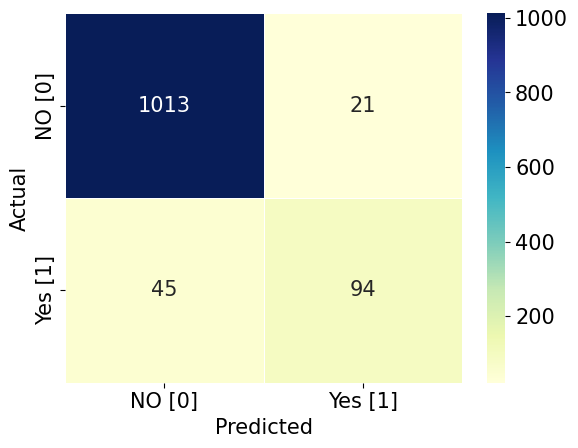

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')

#### Tuning 이후 Test 성능

Test accuracy:  0.9244532803180915
Test recall:  0.567
Test precision:  0.739
Test f1-score:  0.642



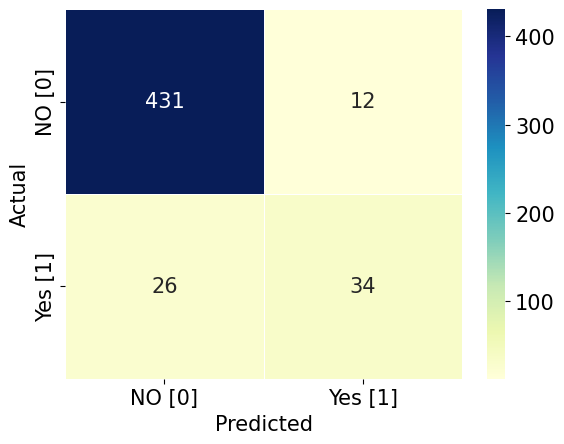

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')



---



## SVM

### 기본 모델

In [ ]:
svc = SVC()

svc.fit(selected_train, train_y)

pred_test = svc.predict(selected_test)
pred_train = svc.predict(selected_train)

### Train 성능 (적합도)

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')

Train accuracy:  0.9607843137254902
Train recall:  0.719
Train precision:  0.935
Train f1-score:  0.813



### Test 성능

Test accuracy:  0.9165009940357853
Test recall:  0.383
Test precision:  0.821
Test f1-score:  0.523



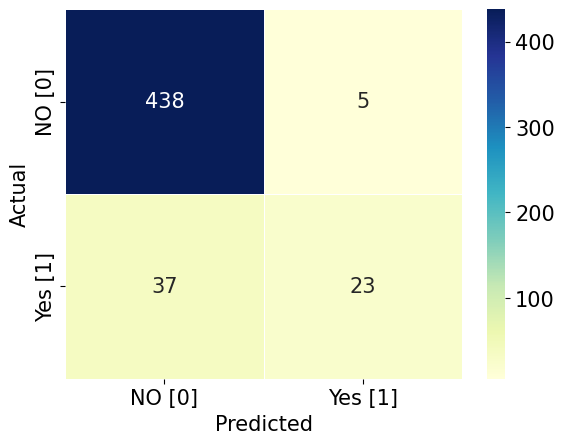

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')

### Hyperparameter Tuning

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from tqdm import tqdm

# 모델 정의
svc = SVC()

# 베이지안 최적화를 위한 파라미터 공간 정의
param_space  = {
    'C': Real(0.001, 10, prior='log-uniform'),
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    'gamma': Categorical(['scale', 'auto']),
    'tol': Real(1e-6, 1e-3, prior='log-uniform')
}


# BayesSearchCV 객체 생성
opt_svm = BayesSearchCV(
    svc,
    param_space,
    n_iter=100,
    random_state=42,
    scoring='recall'
)

# 콜백 생성
tqdm_callback = TqdmCallback(total=100)

# 최적화 수행
opt_svm.fit(selected_train, train_y, callback=[tqdm_callback])

# 최적의 파라미터와 점수 출력
print()
print("Best parameters: ", opt_svm.best_params_)
print("Best score: ", opt_svm.best_score_)




  0%|          | 0/100 [00:00<?, ?it/s]


  1%|          | 1/100 [00:00<00:18,  5.33it/s]


  2%|▏         | 2/100 [00:00<00:17,  5.60it/s]


  3%|▎         | 3/100 [00:00<00:15,  6.12it/s]


  4%|▍         | 4/100 [00:00<00:16,  5.69it/s]


  5%|▌         | 5/100 [00:00<00:17,  5.57it/s]


  6%|▌         | 6/100 [00:01<00:35,  2.61it/s]


  7%|▋         | 7/100 [00:01<00:29,  3.19it/s]


  8%|▊         | 8/100 [00:02<00:24,  3.71it/s]


  9%|▉         | 9/100 [00:02<00:21,  4.32it/s]


 10%|█         | 10/100 [00:03<01:02,  1.45it/s]


 11%|█         | 11/100 [00:06<01:47,  1.21s/it]


 12%|█▏        | 12/100 [00:08<02:13,  1.52s/it]


 13%|█▎        | 13/100 [00:12<03:20,  2.31s/it]


 14%|█▍        | 14/100 [00:14<03:16,  2.29s/it]


 15%|█▌        | 15/100 [00:17<03:19,  2.35s/it]


 16%|█▌        | 16/100 [00:20<03:33,  2.55s/it]


 17%|█▋        | 17/100 [00:22<03:23,  2.45s/it]


 18%|█▊        | 18/100 [00:25<03:38,  2.67s/it]


 19%|█▉        | 19/100 [00:28<03:43,  2.76s/i


Best parameters:  OrderedDict([('C', 0.4818388900843866), ('gamma', 'scale'), ('kernel', 'linear'), ('tol', 5.12884750149173e-06)])
Best score:  0.6470899470899472


#### Hyperparameter Tuning 시각화 (에러나서 생략)

In [ ]:
svc = SVC(**opt_svm.best_params_)

svc.fit(selected_train, train_y)

pred_train = svc.predict(selected_train)
pred_test = svc.predict(selected_test)

#### Tuning 이후 Train 성능

Train accuracy:  0.9471440750213129
Train recall:  0.691
Train precision:  0.835
Train f1-score:  0.756



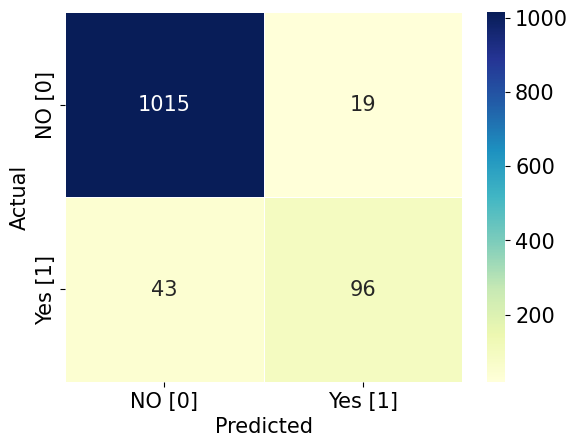

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')

#### Tuning 이후 Test 성능

Test accuracy:  0.9264413518886679
Test recall:  0.55
Test precision:  0.767
Test f1-score:  0.641



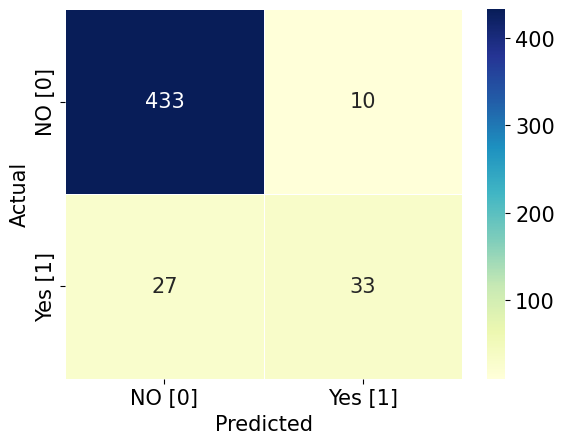

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')



---



## NaiveBayes

### 기본 모델

In [ ]:
gnb = GaussianNB()

gnb.fit(selected_train, train_y)

pred_test = gnb.predict(selected_test)
pred_train = gnb.predict(selected_train)

### Train 성능 (적합도)

Train accuracy:  0.34441602728047743
Train recall:  0.978
Train precision:  0.151
Train f1-score:  0.261



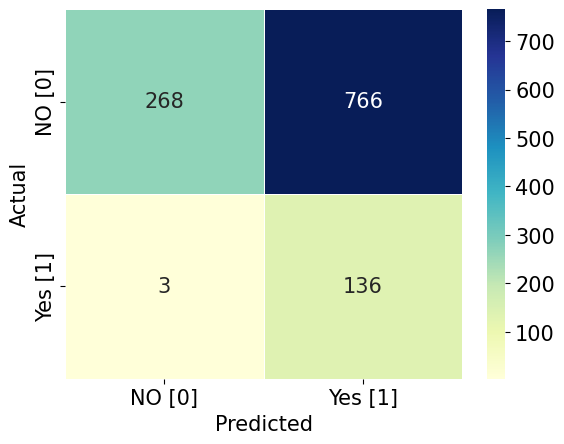

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')

### Test 성능

Test accuracy:  0.34791252485089463
Test recall:  0.95
Test precision:  0.149
Test f1-score:  0.258



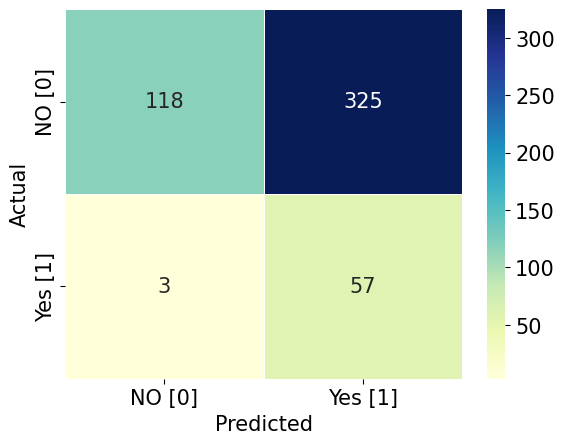

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')

### Hyperparameter Tuning

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from tqdm import tqdm

# 모델 정의
gnb = GaussianNB()

# 베이지안 최적화를 위한 파라미터 공간 정의
param_space = {
    'var_smoothing': Real(1e-9, 1e-3, prior='log-uniform')
}


# BayesSearchCV 객체 생성
opt_nb = BayesSearchCV(
    gnb,
    param_space,
    n_iter=100,
    random_state=42,
    scoring='recall'
)

# 콜백 생성
tqdm_callback = TqdmCallback(total=100)

# 최적화 수행
opt_nb.fit(selected_train, train_y, callback=[tqdm_callback])

# 최적의 파라미터와 점수 출력
print()
print("Best parameters: ", opt_nb.best_params_)
print("Best score: ", opt_nb.best_score_)





  0%|          | 0/100 [00:00<?, ?it/s]



  3%|▎         | 3/100 [00:00<00:03, 25.01it/s]



  6%|▌         | 6/100 [00:00<00:03, 24.81it/s]



  9%|▉         | 9/100 [00:00<00:03, 23.77it/s]



 12%|█▏        | 12/100 [00:02<00:27,  3.25it/s]



 14%|█▍        | 14/100 [00:04<00:44,  1.95it/s]



 15%|█▌        | 15/100 [00:06<00:56,  1.51it/s]



 16%|█▌        | 16/100 [00:07<01:10,  1.20it/s]



 17%|█▋        | 17/100 [00:09<01:20,  1.03it/s]



 18%|█▊        | 18/100 [00:10<01:18,  1.05it/s]



 19%|█▉        | 19/100 [00:10<01:16,  1.06it/s]



 20%|██        | 20/100 [00:11<01:16,  1.04it/s]



 21%|██        | 21/100 [00:12<01:17,  1.02it/s]



 22%|██▏       | 22/100 [00:14<01:20,  1.03s/it]



 23%|██▎       | 23/100 [00:15<01:16,  1.01it/s]



 24%|██▍       | 24/100 [00:16<01:15,  1.01it/s]



 25%|██▌       | 25/100 [00:17<01:16,  1.01s/it]



 26%|██▌       | 26/100 [00:18<01:16,  1.04s/it]



 27%|██▋       | 27/100 [00:19<01:25,  1.17s/it]



 28%|██▊       | 28/


Best parameters:  OrderedDict([('var_smoothing', 2.888176653914472e-07)])
Best score:  0.9785714285714286


#### Hyperparameter Tuning 시각화

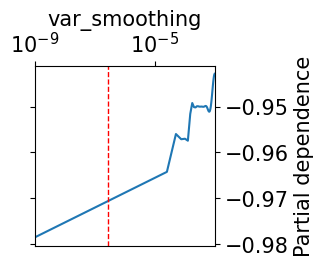

In [ ]:
import matplotlib.pyplot as plt
from skopt.plots import plot_convergence, plot_objective, plot_evaluations

# 목적 함수에 대한 하이퍼파라미터의 영향을 시각화
plot_objective(opt_nb.optimizer_results_[0])
plt.show()

In [ ]:
gnb = GaussianNB(**opt_nb.best_params_)

gnb.fit(selected_train, train_y)

pred_train = gnb.predict(selected_train)
pred_test = gnb.predict(selected_test)

#### Tuning 이후 Train 성능

Train accuracy:  0.3751065643648764
Train recall:  0.978
Train precision:  0.157
Train f1-score:  0.271



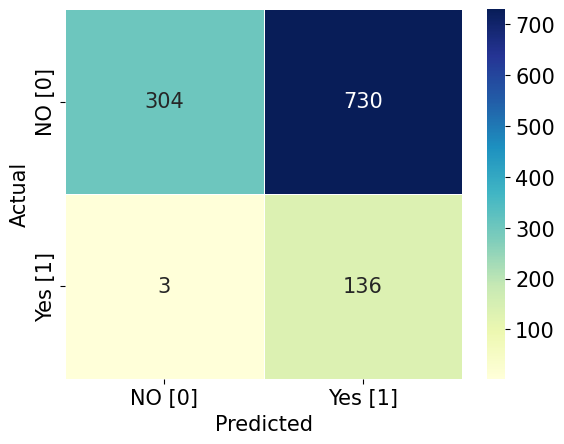

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')

#### Tuning 이후 Test 성능

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')

Test accuracy:  0.3717693836978131
Test recall:  0.917
Test precision:  0.15
Test f1-score:  0.258





---



## 최고 모델 선택


**튜닝 전 Elastic**

In [ ]:
# 일단 제 기준 Best 모델 선택했습니다.
lr = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')
lr.fit(selected_train, train_y)

# 예측 확률 계산
pred_test = lr.predict_proba(selected_test)[:, 1]
prob_test = lr.predict_proba(selected_test)[:, 1]
pred_train = lr.predict_proba(selected_train)[:, 1]

Test accuracy:  0.9264413518886679
Test recall:  0.567
Test precision:  0.756
Test f1-score:  0.648



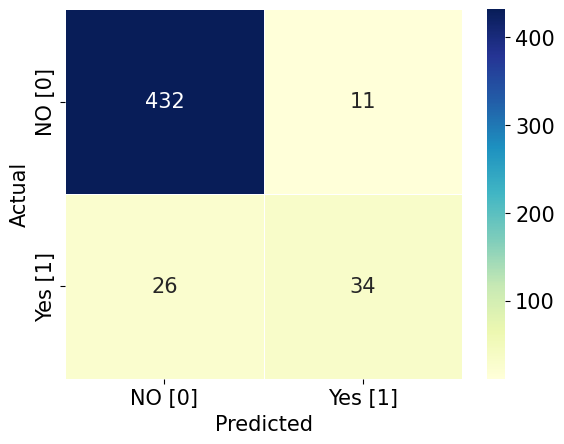

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_test = np.where(pred_test > 0.5, 1, 0)

logit_eval(test_y, pred_test, 'Test')

### ROC-CURVE (Threshold)

Threshold 0:
Accuracy: 0.11928429423459244, Recall: 1.0, Precision: 0.11928429423459244, F1 Score: 0.21314387211367672

Threshold 0.25:
Accuracy: 0.9125248508946322, Recall: 0.75, Precision: 0.6081081081081081, F1 Score: 0.6716417910447762

Threshold 0.5:
Accuracy: 0.9264413518886679, Recall: 0.5666666666666667, Precision: 0.7555555555555555, F1 Score: 0.6476190476190475

Threshold 0.75:
Accuracy: 0.9165009940357853, Recall: 0.35, Precision: 0.875, F1 Score: 0.4999999999999999

Threshold 1:
Accuracy: 0.8807157057654076, Recall: 0.0, Precision: 0.0, F1 Score: 0.0



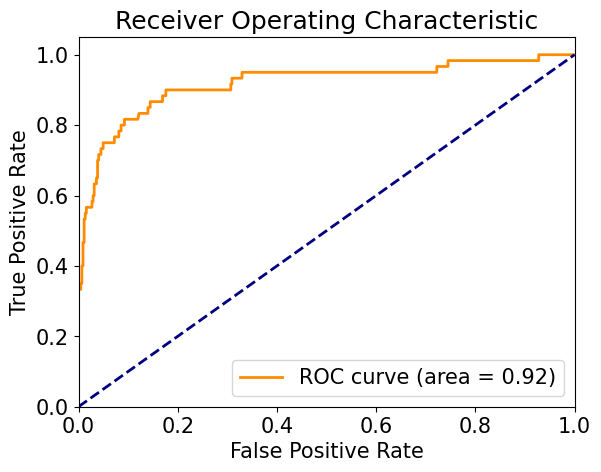

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc

# 다양한 임계값에 따른 예측 결과 및 평가 지표 확인
thresholds = [0, 0.25, 0.5, 0.75, 1]
for threshold in thresholds:
    pred_test = np.where(prob_test > threshold, 1, 0)

    acc = accuracy_score(test_y, pred_test)
    recall = recall_score(test_y, pred_test)
    precision = precision_score(test_y, pred_test)
    f1 = f1_score(test_y, pred_test)

    print(f"Threshold {threshold}:")
    print(f"Accuracy: {acc}, Recall: {recall}, Precision: {precision}, F1 Score: {f1}")
    print()

# ROC curve와 AUC 계산
fpr, tpr, thresholds = roc_curve(test_y, prob_test)
roc_auc = auc(fpr, tpr)

# ROC curve 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()




---



### Threshold 따른 평균 성능 비교

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 임계값 배열 생성
thresholds = np.arange(0, 1.05, 0.05)

# 평가 지표를 저장할 리스트
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

# 각 임계값에 대한 평가 지표 계산
for threshold in thresholds:
    pred_test = np.where(prob_test > threshold, 1, 0)
    accuracy_scores.append(accuracy_score(test_y, pred_test))
    recall_scores.append(recall_score(test_y, pred_test))
    precision_scores.append(precision_score(test_y, pred_test))
    f1_scores.append(f1_score(test_y, pred_test))

# 평가 지표 그리기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_scores, marker='o', label='Accuracy')
plt.plot(thresholds, recall_scores, marker='x', label='Recall')
plt.plot(thresholds, precision_scores, marker='^', label='Precision')
plt.plot(thresholds, f1_scores, marker='s', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Evaluation Metrics at Different Thresholds')
plt.xticks(thresholds, rotation=45)  # x축 눈금 설정
# 0.15
plt.axvline(x=0.15, color='grey', linestyle='--')
plt.text(0.15, 0.5, 'x=0.15', verticalalignment='center', horizontalalignment='left', color='grey', fontsize=12)
# 0.35
plt.axvline(x=0.35, color='grey', linestyle='--')
plt.text(0.35, 0.5, 'x=0.35', verticalalignment='center', horizontalalignment='left', color='grey', fontsize=12)
# 0.5
plt.axvline(x=0.5, color='grey', linestyle='--')
plt.text(0.5, 0.5, 'x=0.5', verticalalignment='center', horizontalalignment='left', color='grey', fontsize=12)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

#### Best Thr = 0.15

In [ ]:
# 0.15
lr = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')
lr.fit(selected_train, train_y)
prob_test = lr.predict_proba(selected_test)[:, 1]
predictions = np.where(prob_test > 0.2, 1, 0)

logit_eval(test_y, predictions, 'Test')

Test accuracy:  0.8986083499005965
Test recall:  0.783
Test precision:  0.553
Test f1-score:  0.648



#### Best Thr = 0.35

Test accuracy:  0.9284294234592445
Test recall:  0.717
Test precision:  0.694
Test f1-score:  0.705



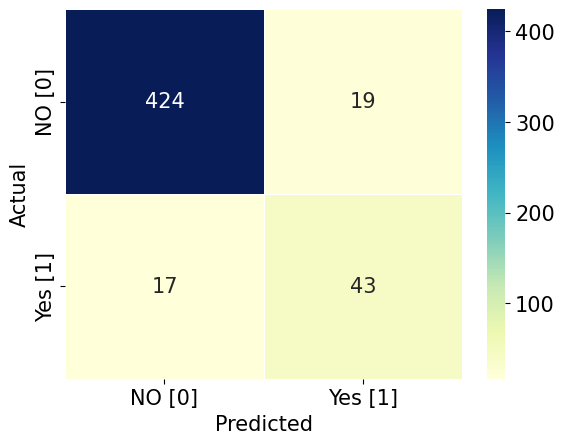

In [ ]:
# 0.35
lr = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')
lr.fit(selected_train, train_y)
prob_test = lr.predict_proba(selected_test)[:, 1]
predictions = np.where(prob_test > 0.35, 1, 0)

logit_eval(test_y, predictions, 'Test')

#### Best Thr = 0.5

Test accuracy:  0.9264413518886679
Test recall:  0.567
Test precision:  0.756
Test f1-score:  0.648



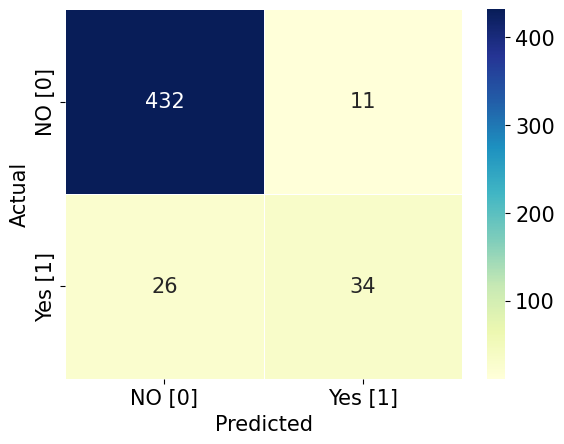

In [ ]:
# 0.5
lr = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')
lr.fit(selected_train, train_y)
prob_test = lr.predict_proba(selected_test)[:, 1]
predictions = np.where(prob_test > 0.5, 1, 0)

logit_eval(test_y, predictions, 'Test')



---



### PCA 차원따른 성능 비교

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression


# 결과를 저장할 리스트 초기화
acc_scores, recall_scores, precision_scores, f1_scores = [], [], [], []

# 모델 초기화
lr = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

# 1차원부터 데이터의 column 수 - 1까지 PCA를 적용하며 성능 평가
n_columns = selected_train.shape[1]
for n_components in range(1, n_columns):
    # PCA 적용
    pca = PCA(n_components=n_components)
    pca_train = pca.fit_transform(selected_train)
    pca_test = pca.transform(selected_test)

    # 모델 학습 및 예측
    lr.fit(pca_train, train_y)
    prob_test = lr.predict_proba(pca_test)[:, 1]
    predictions = np.where(prob_test > 0.5, 1, 0)

    # 성능 지표 계산
    acc_scores.append(accuracy_score(test_y, predictions))
    recall_scores.append(recall_score(test_y, predictions))
    precision_scores.append(precision_score(test_y, predictions))
    f1_scores.append(f1_score(test_y, predictions))

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_columns), acc_scores, label='Accuracy')
plt.plot(range(1, n_columns), recall_scores, label='Recall')
plt.plot(range(1, n_columns), precision_scores, label='Precision')
plt.plot(range(1, n_columns), f1_scores, label='F1 Score')
plt.xlabel('Number of PCA Components')
plt.ylabel('Scores')
plt.title('Performance Metrics vs PCA Components')
plt.axvline(x=27, color='grey', linestyle='--')
plt.text(27, 0.5, 'x=27', verticalalignment='center', horizontalalignment='left', color='grey', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


#### Best PCA차원

Test accuracy:  0.9343936381709742
Test recall:  0.617
Test precision:  0.787
Test f1-score:  0.692



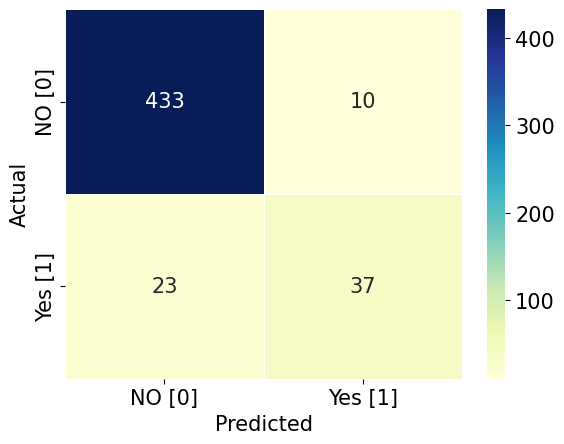

In [ ]:
pca = PCA(n_components=27)
pca_train = pca.fit_transform(selected_train)
pca_test = pca.transform(selected_test) # Only Transform

# 모델 학습 및 예측
lr = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')
lr.fit(pca_train, train_y)
prob_test = lr.predict_proba(pca_test)[:, 1]
predictions = np.where(prob_test > 0.5, 1, 0)

logit_eval(test_y, predictions, 'Test')



---



### Train으로 학습한 PCA로 Test도 Embedding (시각화)

In [ ]:
from sklearn.decomposition import PCA

# PCA 수행
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(selected_train.iloc[:,:])
X_pca_test = pca.transform(selected_test.iloc[:,:])


# PCA 결과와 레이블을 데이터프레임에 추가
df_train = pd.DataFrame(X_pca_train, columns=['PC1', 'PC2'])
df_test = pd.DataFrame(X_pca_test, columns=['PC1', 'PC2'])
df_train['istrain'] = 'train'
df_test['istrain'] = 'test'

df_all = pd.concat([df_train, df_test],axis=0)

# 시각화
plt.figure(figsize=(8, 6))
for label in np.unique(df_all['istrain']):
    plt.scatter(df_all[df_all['istrain'] == label]['PC1'], df_all[df_all['istrain'] == label]['PC2'], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of the Data')
plt.legend()
plt.show()

### 전체 데이터로 학습한 PCA Embedding (시각화)

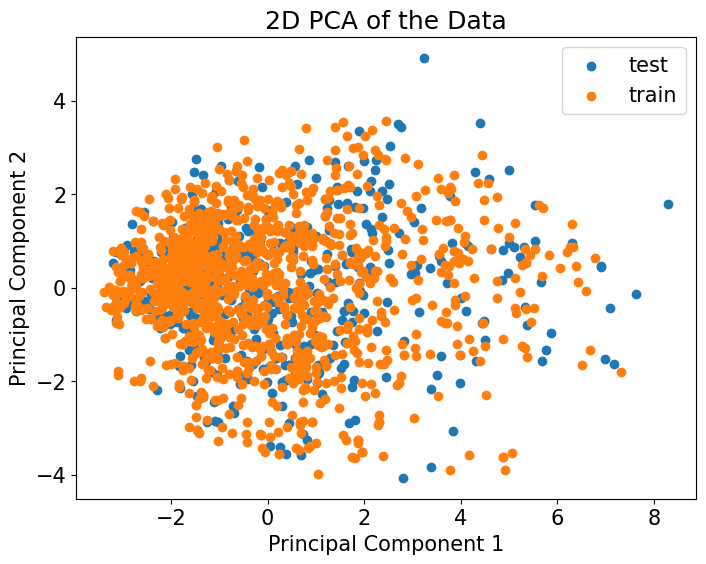

In [ ]:
from sklearn.decomposition import PCA

# PCA 수행
pca = PCA(n_components=2)

train_t = selected_train.copy()
test_t = selected_test.copy()

all_data = pd.concat([train_t, test_t])
X_train = pca.fit_transform(all_data.iloc[:,:])

# PCA 결과와 레이블을 데이터프레임에 추가
df_all = pd.DataFrame(X_train, columns=['PC1', 'PC2'])
df_all['istrain'] = 'test'
df_all['istrain'][:len(train_t)] = 'train'


# 시각화
plt.figure(figsize=(8, 6))
for label in np.unique(df_all['istrain']):
    plt.scatter(df_all[df_all['istrain'] == label]['PC1'], df_all[df_all['istrain'] == label]['PC2'], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of the Data')
plt.legend()
plt.show()



---



## Best Model에 대하여

###  모델의 Column과 계수

In [ ]:
# 일단 제 기준 Best 모델 선택했습니다.
lr = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')
lr.fit(selected_train, train_y)

# 예측 확률 계산
pred_test = lr.predict_proba(selected_test)[:, 1]
pred_train = lr.predict_proba(selected_train)[:, 1]

In [ ]:
df_coef = pd.DataFrame(lr.coef_.reshape(-1,1), columns=['coef'])
df_coef['column'] = selected_train.columns
df_coef = df_coef.sort_values('coef')

df_coef = df_coef.reset_index(drop=True)
df_coef

coef                           column
0  -1.260289               YearsInCurrentRole
1  -1.115358                TotalWorkingYears
2  -1.003250                              Age
3  -0.753258                   JobInvolvement
4  -0.747590          EnvironmentSatisfaction
5  -0.706962           MaritalStatus_Divorced
6  -0.668331            MaritalStatus_Married
7  -0.564554                  WorkLifeBalance
8  -0.532284                JobRole_Therapist
9  -0.457418                  JobSatisfaction
10 -0.452682           JobRole_Administrative
11 -0.419004                         JobLevel
12 -0.310051                            Shift
13 -0.258726         RelationshipSatisfaction
14 -0.208758                    JobRole_Admin
15 -0.081571                        DailyRate
16 -0.074787                   YearsAtCompany
17 -0.030237                    JobRole_Nurse
18  0.000000             YearsWithCurrManager
19  0.040703             EducationField_Other
20  0.126755         EducationField_Marketing
21  0.132161     EducationField_Life Sciences
22  0.162011   EducationField_Human Resources
23  0.179332                           Gender
24  0.184448            Department_Cardiology
25  0.301628  EducationField_Technical Degree
26  0.468850                   BusinessTravel
27  0.603450               NumCompaniesWorked
28  0.740551                 DistanceFromHome
29  0.939236          YearsSinceLastPromotion
30  1.785012                         OverTime



---



###  모델의 Train 성능 (p-value 대체용 적합도 확인)

Train accuracy:  0.9445865302642796
Train recall:  0.669
Train precision:  0.83
Train f1-score:  0.741



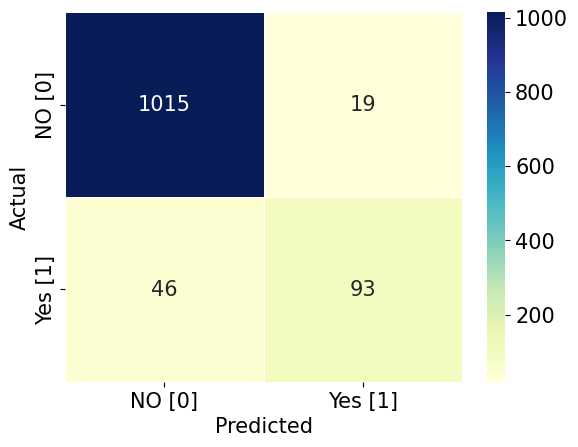

In [ ]:
# 확률을 이진 분류 결과로 변환 (기본 임계값 0.5)
pred_train = np.where(pred_train > 0.5, 1, 0)

logit_eval(train_y, pred_train, 'Train')



---



###  이탈 비율의 신뢰구간

In [ ]:
# 예시 데이터프레임 생성 (1000개의 샘플, 1개의 특성과 1개의 레이블)
n_samples = selected_train.shape[0]
data = selected_train.copy()
data['y'] = train_set_y.copy()

# 신뢰구간 계산 (alpha = 0.05)
z = 1.96
p_hat = len(data[data.y==1]) / len(data)

ci_lower = p_hat - z * np.sqrt(p_hat*(1-p_hat) / n_samples)
ci_upper = p_hat + z * np.sqrt(p_hat*(1-p_hat) / n_samples)

# 신뢰구간 확인
print("신뢰구간 상한 : " + str(ci_upper))
print("신뢰구간 하한 : " + str(ci_lower))
print()

신뢰구간 상한 : 0.1369955271484732
신뢰구간 하한 : 0.10000362033660778

